## Import Relevant Libraries

In [306]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from scikeras.wrappers import KerasClassifier
import joblib

## Load The Data

In [307]:
data = pd.read_csv("../data/CustomerChurn_dataset.csv")

## Data Preprocessing

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [309]:
# check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [310]:
# loop through the categorical columns and replace spaces with np.nan
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].replace(' ', np.nan)

In [311]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [312]:
# convert TotalCharges to numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

In [313]:
# impute missing values in TotalCharges column
imputer = SimpleImputer(strategy='mean')
data["TotalCharges"] = imputer.fit_transform(data[["TotalCharges"]])

In [314]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [316]:
# check all the uqniue values in each column
for col in data.columns:
    print(col, ":", len(data[col].unique()), "\n", data[col].unique(), "\n")

customerID : 7043 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender : 2 
 ['Female' 'Male'] 

SeniorCitizen : 2 
 [0 1] 

Partner : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['No' 'Yes'] 

tenure : 73 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService : 2 
 ['No' 'Yes'] 

MultipleLines : 3 
 ['No phone service' 'No' 'Yes'] 

InternetService : 3 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : 3 
 ['No' 'Yes' 'No internet service'] 

OnlineBackup : 3 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection : 3 
 ['No' 'Yes' 'No internet service'] 

TechSupport : 3 
 ['No' 'Yes' 'No internet service'] 

StreamingTV : 3 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies : 3 
 ['No' 'Yes' 'No internet service'] 

Contract : 3 
 ['Month-to-month' 'One year' 'Two 

Data cleaning

In [317]:
# customerID does not provide any information about customer churn
data.drop("customerID", axis=1, inplace=True)

In [318]:
# having no interner/phone service is same as no
# replace No internet service and No phone service with No
for col in data.columns:
    if "No internet service" in data[col].unique():
        data[col] = data[col].replace("No internet service", "No")
    elif "No phone service" in data[col].unique():
        data[col] = data[col].replace("No phone service", "No")

In [319]:
# check all the uqniue values in each column
for col in data.columns:
    print(col, ":", len(data[col].unique()), "\n", data[col].unique(), "\n")

gender : 2 
 ['Female' 'Male'] 

SeniorCitizen : 2 
 [0 1] 

Partner : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['No' 'Yes'] 

tenure : 73 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService : 2 
 ['No' 'Yes'] 

MultipleLines : 2 
 ['No' 'Yes'] 

InternetService : 3 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : 2 
 ['No' 'Yes'] 

OnlineBackup : 2 
 ['Yes' 'No'] 

DeviceProtection : 2 
 ['No' 'Yes'] 

TechSupport : 2 
 ['No' 'Yes'] 

StreamingTV : 2 
 ['No' 'Yes'] 

StreamingMovies : 2 
 ['No' 'Yes'] 

Contract : 3 
 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : 2 
 ['Yes' 'No'] 

PaymentMethod : 4 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges : 1585 
 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

TotalCharges : 6531 
 [  29.85

In [320]:
# list numerical and categorical columns
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_cols = [col for col in data.columns if col not in num_cols and col != "Churn"]

In [321]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [322]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [323]:
data["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

## Feature Importance and Selection

In [324]:
encoder = OneHotEncoder()
encode_data = encoder.fit(data[cat_cols])
encoded_data = encode_data.transform(data[cat_cols]).toarray()

In [325]:
nnn = encoder.get_feature_names_out(cat_cols).tolist()
encoded_df = pd.DataFrame(data=encoded_data, columns=nnn)
encoded_df

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [326]:
data_encoded = pd.concat([data[num_cols], encoded_df], axis=1)

In [327]:
for col in data_encoded.columns:
    print(col)

tenure
MonthlyCharges
TotalCharges
gender_Female
gender_Male
SeniorCitizen_0
SeniorCitizen_1
Partner_No
Partner_Yes
Dependents_No
Dependents_Yes
PhoneService_No
PhoneService_Yes
MultipleLines_No
MultipleLines_Yes
InternetService_DSL
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_Yes
TechSupport_No
TechSupport_Yes
StreamingTV_No
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_Yes
Contract_Month-to-month
Contract_One year
Contract_Two year
PaperlessBilling_No
PaperlessBilling_Yes
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [328]:
data_encoded["Churn"] = pd.get_dummies(data["Churn"], drop_first=True)

In [329]:
y = data_encoded["Churn"]
X = data_encoded.drop("Churn", axis=1)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [330]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [331]:
# using RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# train the model
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

# check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

# check feature importance
print(rf.feature_importances_)

Accuracy 0.7934705464868701
[0.14302533 0.14922684 0.16501611 0.01801073 0.01791603 0.01218375
 0.01247227 0.0153988  0.01558738 0.01207325 0.01206143 0.00487925
 0.00483514 0.01205766 0.01256503 0.01008333 0.03410554 0.01325656
 0.0146526  0.01194608 0.01391326 0.01409202 0.01210494 0.01219437
 0.01103544 0.01440546 0.01146681 0.01077474 0.01174813 0.011099
 0.05560582 0.00987914 0.02509952 0.01480399 0.01563686 0.01157041
 0.01228827 0.02942443 0.01150428]


In [332]:
# create a dataframe of feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# sort the dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# calculate the importance percentage
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100

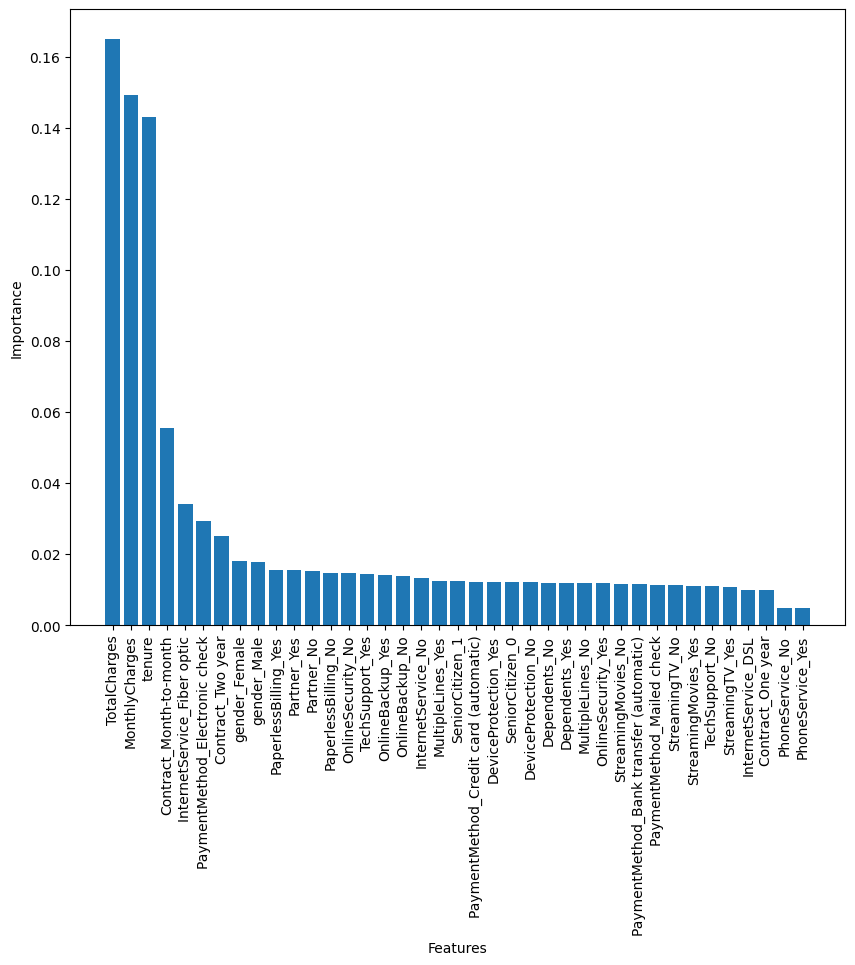

In [333]:
plt.figure(figsize=(10, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
# make the x-axis labels slanted
plt.xticks(rotation=90)
plt.show()

from the graph, the 1st 7 columns contribute the most to customer churn

In [334]:
print("Percentage contribution", feature_importance_df['Percentage'][:7].sum())
print()
print("Top 7 features:\n", "-"*15, sep="")
for col in feature_importance_df['Feature'][:7]:
    print(col)

Percentage contribution 60.15035892501258

Top 7 features:
---------------
TotalCharges
MonthlyCharges
tenure
Contract_Month-to-month
InternetService_Fiber optic
PaymentMethod_Electronic check
Contract_Two year


From the output above, we can see that TotalCharges, MonthlyCharges, tenure, Contract, InternetService and PaymentMethod are the top 6 features that contribute the most to the churn.

In [335]:
# calculating the percentage contribution of top 6 features
# including all its sub-segments

contribution = feature_importance_df[feature_importance_df["Feature"].str.contains("Contract|InternetService|PaymentMethod")]["Percentage"].sum() + feature_importance_df["Percentage"][:3].sum()

print("Percentage contribution", contribution)

Percentage contribution 67.00855750380394


In [336]:
feature_imp_cols = feature_importance_df[feature_importance_df["Feature"].str.contains("Contract|InternetService|PaymentMethod")]["Feature"].to_list() + feature_importance_df["Feature"][:3].to_list()
feature_imp_cols

['Contract_Month-to-month',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'Contract_Two year',
 'InternetService_No',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Mailed check',
 'InternetService_DSL',
 'Contract_One year',
 'TotalCharges',
 'MonthlyCharges',
 'tenure']

In [337]:
# define important columnsa
imp_cols = [
    "TotalCharges",
    "MonthlyCharges",
    "tenure",
    "Contract",
    "InternetService",
    "PaymentMethod",
]

### Selected Features
1. TotalCharges
2. MonthlyCharges
3. tenure
4. Contract
5. InternetService
6. PaymentMethod

## Exploratory Data Analysis

In [338]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [339]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Insights (Numerical Features)

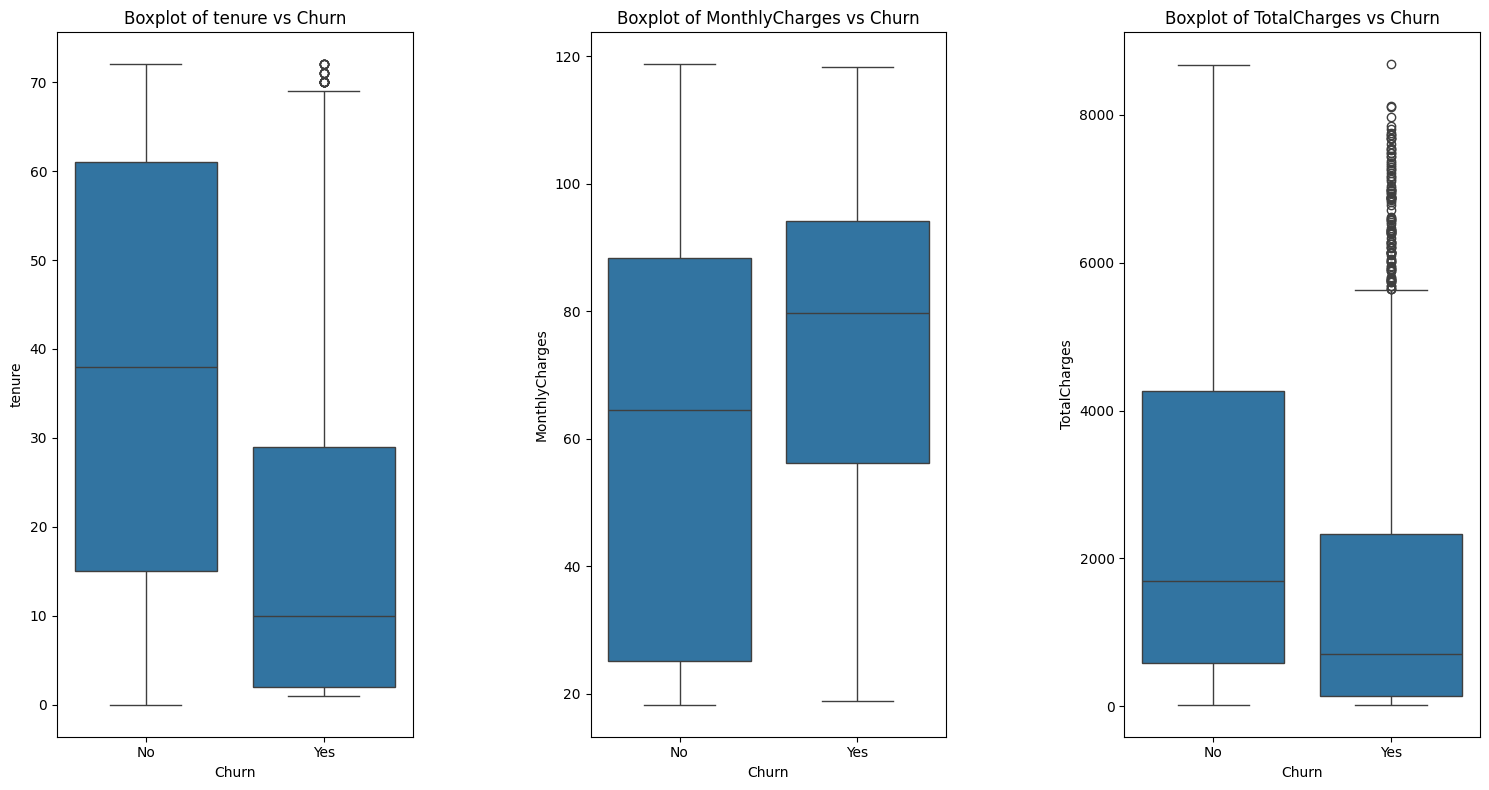

In [340]:
# define subplot axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

num = 0 # track the axes position

for col in num_cols:
    sns.boxplot(x="Churn", y=col, data=data, ax=axes[num])
    axes[num].set_title(f"Boxplot of {col} vs Churn")
    num += 1

plt.tight_layout() # to avoid overlapping of subplots
plt.subplots_adjust(wspace=0.5) # space between subplots
plt.show()

#### Notes
- **Tenure:** Majority of the customers who churned spent less months with the company. It goes to show that the longer the customer stays with the company, the lesser the chances of them churning.
- **Monthly Charges:** Customers who churned were charged more on a monthly basis. This could be due to the fact that they were on a short term contract. The boxplot of the *tenure* feature shows that customers who churned were on a short term contract (possibly).
- **Total Charges:** Customers who churned were charged relatively less than those who did not churn. However, there are outliers that showed that some customers who churned were charged more than those who did not churn.
- Overall, **tenure**, **MonthlyCharges** and **TotalCharges** are important features that contribute to customer churn.

### Insights (Categorical Features)

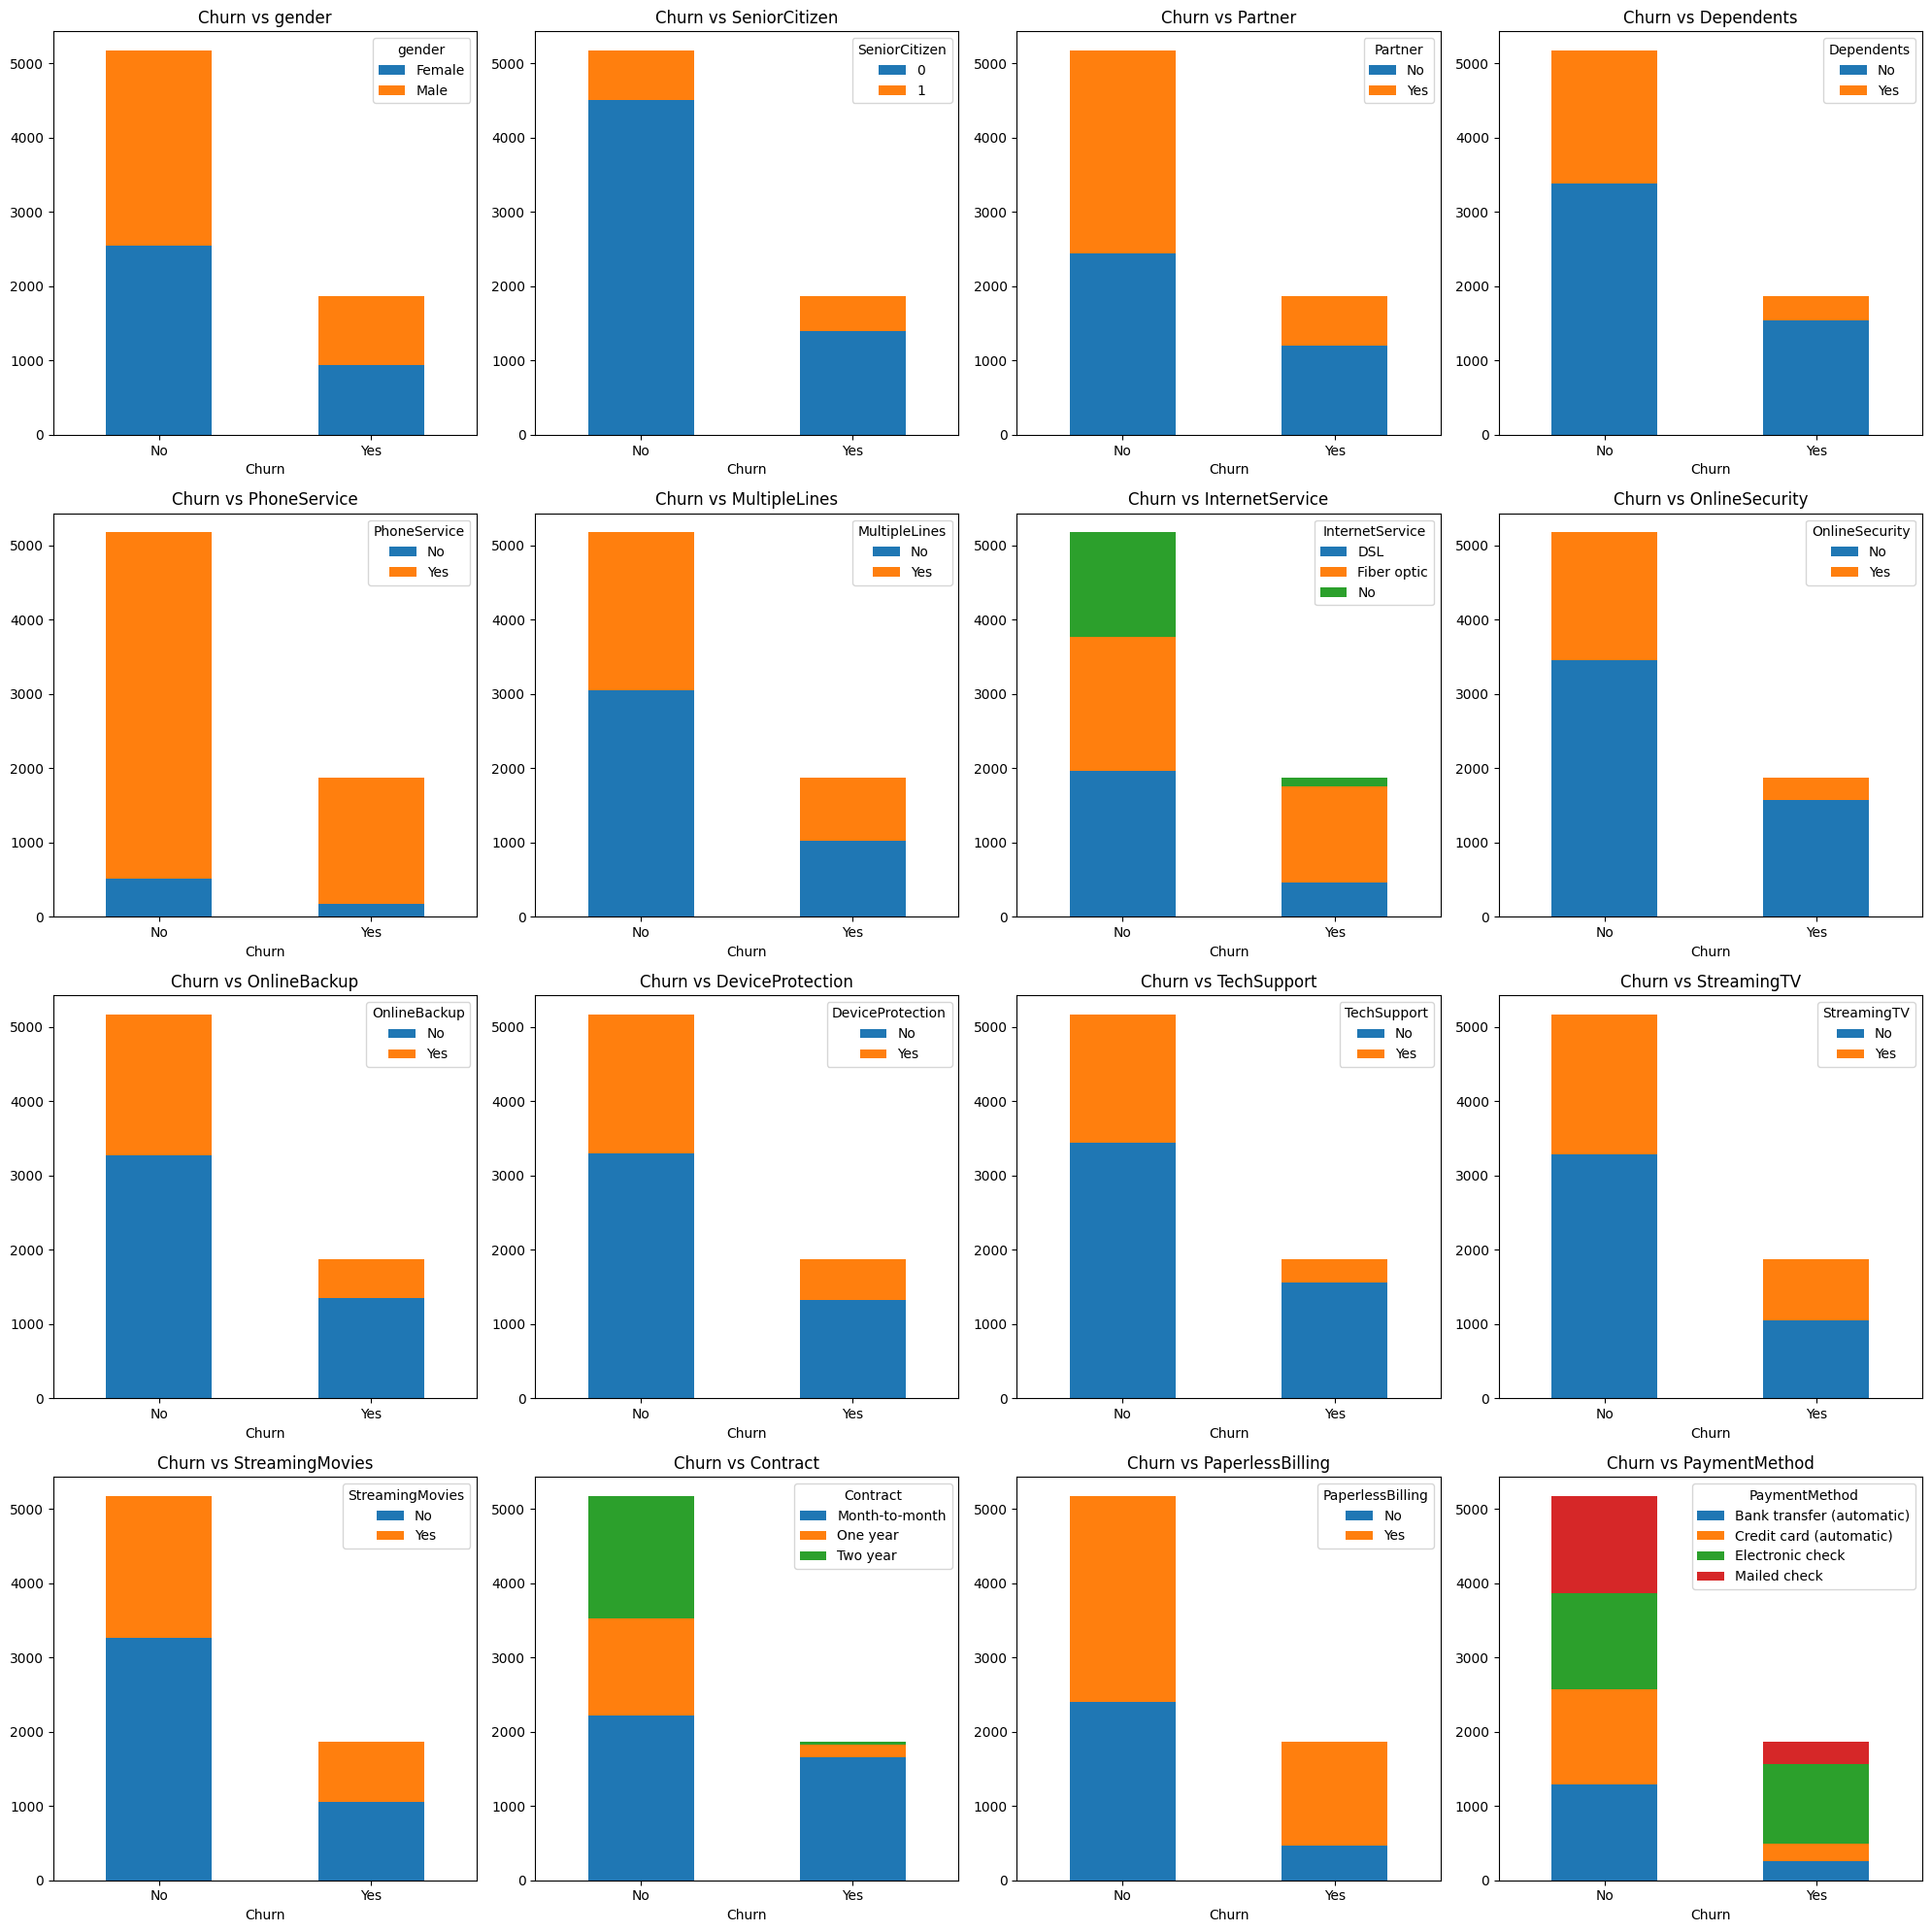

In [341]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

x_num = 0 # track the x axis position
y_num = 0 # track the y axis position

for col in cat_cols:
    cross_tab = pd.crosstab(data['Churn'], data[col])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[x_num, y_num], rot=0)
    axes[x_num, y_num].set_title(f"Churn vs {col}")

    # adjust the axes position
    if y_num == 3:
        x_num += 1
        y_num = 0
    else:
        y_num += 1

plt.tight_layout()
plt.show()

#### Notes
- Out of the customers who churned, the proportion of males and females are almost the same.
- Whether or not a customer has a partner does not seem to have a significant impact on customer churn. The same applies to senior citizens and customers who have dependents.
- Customers who have a 2yr contract with the company are less likely to churn. This is because they are tied to the company for 2 years. That trend continues with customers who have a 1yr or monthly based contract with the company.
- Customers who have no internet service are less likely to churn. A significant portion of DSL customers did not churn. Fibre optic customers are more likely to churn (about 2x more likely).
- Customers who pay via electronic check are more likely to churn. Customers who pay via mailed check are less likely to churn.

The features that show high contrast with respect to customer churn are those whose opposite classes are far apart. From the graph the features that show high contrast are:
1. InternetService
2. Contract
3. PaymentMethod

### Concluding Insights

From the EDA, we can conclude that the following features are important in predicting customer churn:
1. Tenure
2. MonthlyCharges
3. TotalCharges
4. InternetService
5. Contract
6. PaymentMethod

This corresponds to the features that were selected using the feature importance selection from the random forest classifier.

## Training the Model (MLP)

In [342]:
xcols = feature_imp_cols
xcols

['Contract_Month-to-month',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'Contract_Two year',
 'InternetService_No',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Mailed check',
 'InternetService_DSL',
 'Contract_One year',
 'TotalCharges',
 'MonthlyCharges',
 'tenure']

In [343]:
data_encoded.head()[xcols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Contract_Month-to-month                  5 non-null      float64
 1   InternetService_Fiber optic              5 non-null      float64
 2   PaymentMethod_Electronic check           5 non-null      float64
 3   Contract_Two year                        5 non-null      float64
 4   InternetService_No                       5 non-null      float64
 5   PaymentMethod_Credit card (automatic)    5 non-null      float64
 6   PaymentMethod_Bank transfer (automatic)  5 non-null      float64
 7   PaymentMethod_Mailed check               5 non-null      float64
 8   InternetService_DSL                      5 non-null      float64
 9   Contract_One year                        5 non-null      float64
 10  TotalCharges                             5 non-null   

In [344]:
data_encoded[xcols].shape

(7043, 13)

In [345]:
data_encoded["Churn"].head()

0    False
1    False
2     True
3    False
4     True
Name: Churn, dtype: bool

In [346]:
# split the data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(data_encoded[xcols], data_encoded["Churn"], test_size=0.2, random_state=42)

# split the train data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# show the shape of train, validation and test data
print("Train data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Train data shape: (4507, 13)
Validation data shape: (1127, 13)
Test data shape: (1409, 13)


In [347]:
X_train.head()

,Contract_Month-to-month,InternetService_Fiber optic,PaymentMethod_Electronic check,Contract_Two year,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,InternetService_DSL,Contract_One year,TotalCharges,MonthlyCharges,tenure
4806,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1195.95,19.45,67
3409,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7714.65,113.65,70
3339,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6161.90,88.00,68
3541,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2070.75,40.65,49
4009,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5309.50,86.70,63


In [348]:
# scale the numerical columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [349]:
# convert data type to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [350]:
X_train.shape

(4507, 13)

In [351]:
y_train.head()

4806    False
3409    False
3339    False
3541    False
4009    False
Name: Churn, dtype: bool

### Define Model Architecture

In [352]:
def create_model(optimizer='adam'):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(128, activation='relu')(input_layer)
    dense_layer_2 = Dense(64, activation='tanh')(dense_layer_1)
    dense_layer_3 = Dense(32, activation='elu')(dense_layer_2)
    dense_layer_4 = Dense(16, activation='relu')(dense_layer_3)
    dense_layer_5 = Dense(8, activation='tanh')(dense_layer_4)
    output_layer = Dense(1, activation='sigmoid')(dense_layer_5)

    # define the model with input layer and output layer
    model = Model(inputs=input_layer, outputs=output_layer)

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [353]:
# implement grid search using kerasClassifier
# perform grid search
model_kcf = KerasClassifier(build_fn=create_model, verbose=2)

# define the grid search parameters
batch_size = [20, 32, 64, 128]
epochs = [20, 40, 60, 80, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model_kcf, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/20


/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4739 - accuracy: 0.7676 - 1s/epoch - 9ms/step
Epoch 2/20
151/151 - 0s - loss: 0.4404 - accuracy: 0.7850 - 223ms/epoch - 1ms/step
Epoch 3/20
151/151 - 0s - loss: 0.4303 - accuracy: 0.7953 - 236ms/epoch - 2ms/step
Epoch 4/20
151/151 - 0s - loss: 0.4305 - accuracy: 0.7889 - 235ms/epoch - 2ms/step
Epoch 5/20
151/151 - 0s - loss: 0.4234 - accuracy: 0.7933 - 231ms/epoch - 2ms/step
Epoch 6/20
151/151 - 0s - loss: 0.4233 - accuracy: 0.7939 - 230ms/epoch - 2ms/step
Epoch 7/20
151/151 - 0s - loss: 0.4204 - accuracy: 0.7956 - 231ms/epoch - 2ms/step
Epoch 8/20
151/151 - 0s - loss: 0.4183 - accuracy: 0.8003 - 235ms/epoch - 2ms/step
Epoch 9/20
151/151 - 0s - loss: 0.4205 - accuracy: 0.7936 - 239ms/epoch - 2ms/step
Epoch 10/20
151/151 - 0s - loss: 0.4192 - accuracy: 0.8009 - 222ms/epoch - 1ms/step
Epoch 11/20
151/151 - 0s - loss: 0.4138 - accuracy: 0.8006 - 226ms/epoch - 1ms/step
Epoch 12/20
151/151 - 0s - loss: 0.4164 - accuracy: 0.7963 - 228ms/epoch - 2ms/step
Epoch 13/20
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4628 - accuracy: 0.7790 - 1s/epoch - 9ms/step
Epoch 2/20
151/151 - 0s - loss: 0.4308 - accuracy: 0.7940 - 225ms/epoch - 1ms/step
Epoch 3/20
151/151 - 0s - loss: 0.4262 - accuracy: 0.7973 - 232ms/epoch - 2ms/step
Epoch 4/20
151/151 - 0s - loss: 0.4236 - accuracy: 0.7987 - 242ms/epoch - 2ms/step
Epoch 5/20
151/151 - 0s - loss: 0.4200 - accuracy: 0.7977 - 237ms/epoch - 2ms/step
Epoch 6/20
151/151 - 0s - loss: 0.4214 - accuracy: 0.7967 - 235ms/epoch - 2ms/step
Epoch 7/20
151/151 - 0s - loss: 0.4187 - accuracy: 0.8010 - 243ms/epoch - 2ms/step
Epoch 8/20
151/151 - 0s - loss: 0.4152 - accuracy: 0.8007 - 260ms/epoch - 2ms/step
Epoch 9/20
151/151 - 0s - loss: 0.4152 - accuracy: 0.8020 - 235ms/epoch - 2ms/step
Epoch 10/20
151/151 - 0s - loss: 0.4131 - accuracy: 0.8033 - 225ms/epoch - 1ms/step
Epoch 11/20
151/151 - 0s - loss: 0.4131 - accuracy: 0.8017 - 268ms/epoch - 2ms/step
Epoch 12/20
151/151 - 0s - loss: 0.4132 - accuracy: 0.8017 - 250ms/epoch - 2ms/step
Epoch 13/20
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4702 - accuracy: 0.7691 - 1s/epoch - 8ms/step
Epoch 2/20
151/151 - 0s - loss: 0.4461 - accuracy: 0.7920 - 221ms/epoch - 1ms/step
Epoch 3/20
151/151 - 0s - loss: 0.4412 - accuracy: 0.7814 - 221ms/epoch - 1ms/step
Epoch 4/20
151/151 - 0s - loss: 0.4357 - accuracy: 0.7884 - 213ms/epoch - 1ms/step
Epoch 5/20
151/151 - 0s - loss: 0.4350 - accuracy: 0.7874 - 221ms/epoch - 1ms/step
Epoch 6/20
151/151 - 0s - loss: 0.4325 - accuracy: 0.7960 - 221ms/epoch - 1ms/step
Epoch 7/20
151/151 - 0s - loss: 0.4302 - accuracy: 0.7933 - 217ms/epoch - 1ms/step
Epoch 8/20
151/151 - 0s - loss: 0.4301 - accuracy: 0.7960 - 239ms/epoch - 2ms/step
Epoch 9/20
151/151 - 0s - loss: 0.4263 - accuracy: 0.7943 - 233ms/epoch - 2ms/step
Epoch 10/20
151/151 - 0s - loss: 0.4264 - accuracy: 0.7970 - 220ms/epoch - 1ms/step
Epoch 11/20
151/151 - 0s - loss: 0.4246 - accuracy: 0.7970 - 220ms/epoch - 1ms/step
Epoch 12/20
151/151 - 0s - loss: 0.4242 - accuracy: 0.7953 - 220ms/epoch - 1ms/step
Epoch 13/20
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4734 - accuracy: 0.7746 - 1s/epoch - 9ms/step
Epoch 2/40
151/151 - 0s - loss: 0.4331 - accuracy: 0.7916 - 234ms/epoch - 2ms/step
Epoch 3/40
151/151 - 0s - loss: 0.4258 - accuracy: 0.7966 - 219ms/epoch - 1ms/step
Epoch 4/40
151/151 - 0s - loss: 0.4237 - accuracy: 0.7959 - 222ms/epoch - 1ms/step
Epoch 5/40
151/151 - 0s - loss: 0.4215 - accuracy: 0.7986 - 226ms/epoch - 1ms/step
Epoch 6/40
151/151 - 0s - loss: 0.4188 - accuracy: 0.7969 - 236ms/epoch - 2ms/step
Epoch 7/40
151/151 - 0s - loss: 0.4182 - accuracy: 0.8023 - 226ms/epoch - 1ms/step
Epoch 8/40
151/151 - 0s - loss: 0.4165 - accuracy: 0.8003 - 220ms/epoch - 1ms/step
Epoch 9/40
151/151 - 0s - loss: 0.4173 - accuracy: 0.8019 - 227ms/epoch - 2ms/step
Epoch 10/40
151/151 - 0s - loss: 0.4167 - accuracy: 0.8009 - 227ms/epoch - 2ms/step
Epoch 11/40
151/151 - 0s - loss: 0.4127 - accuracy: 0.8019 - 214ms/epoch - 1ms/step
Epoch 12/40
151/151 - 0s - loss: 0.4149 - accuracy: 0.8029 - 227ms/epoch - 2ms/step
Epoch 13/40
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4681 - accuracy: 0.7777 - 1s/epoch - 8ms/step
Epoch 2/40
151/151 - 0s - loss: 0.4313 - accuracy: 0.8003 - 219ms/epoch - 1ms/step
Epoch 3/40
151/151 - 0s - loss: 0.4290 - accuracy: 0.7963 - 267ms/epoch - 2ms/step
Epoch 4/40
151/151 - 0s - loss: 0.4226 - accuracy: 0.7973 - 222ms/epoch - 1ms/step
Epoch 5/40
151/151 - 0s - loss: 0.4219 - accuracy: 0.7980 - 219ms/epoch - 1ms/step
Epoch 6/40
151/151 - 0s - loss: 0.4187 - accuracy: 0.8043 - 241ms/epoch - 2ms/step
Epoch 7/40
151/151 - 0s - loss: 0.4176 - accuracy: 0.7993 - 233ms/epoch - 2ms/step
Epoch 8/40
151/151 - 0s - loss: 0.4181 - accuracy: 0.8007 - 220ms/epoch - 1ms/step
Epoch 9/40
151/151 - 0s - loss: 0.4131 - accuracy: 0.8047 - 218ms/epoch - 1ms/step
Epoch 10/40
151/151 - 0s - loss: 0.4142 - accuracy: 0.8027 - 217ms/epoch - 1ms/step
Epoch 11/40
151/151 - 0s - loss: 0.4153 - accuracy: 0.8033 - 218ms/epoch - 1ms/step
Epoch 12/40
151/151 - 0s - loss: 0.4134 - accuracy: 0.8013 - 231ms/epoch - 2ms/step
Epoch 13/40
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4755 - accuracy: 0.7664 - 1s/epoch - 9ms/step
Epoch 2/40
151/151 - 0s - loss: 0.4443 - accuracy: 0.7877 - 218ms/epoch - 1ms/step
Epoch 3/40
151/151 - 0s - loss: 0.4381 - accuracy: 0.7920 - 272ms/epoch - 2ms/step
Epoch 4/40
151/151 - 0s - loss: 0.4337 - accuracy: 0.7970 - 217ms/epoch - 1ms/step
Epoch 5/40
151/151 - 0s - loss: 0.4324 - accuracy: 0.7917 - 222ms/epoch - 1ms/step
Epoch 6/40
151/151 - 0s - loss: 0.4311 - accuracy: 0.7894 - 237ms/epoch - 2ms/step
Epoch 7/40
151/151 - 0s - loss: 0.4285 - accuracy: 0.7943 - 236ms/epoch - 2ms/step
Epoch 8/40
151/151 - 0s - loss: 0.4307 - accuracy: 0.7937 - 222ms/epoch - 1ms/step
Epoch 9/40
151/151 - 0s - loss: 0.4280 - accuracy: 0.7903 - 224ms/epoch - 1ms/step
Epoch 10/40
151/151 - 0s - loss: 0.4258 - accuracy: 0.7973 - 226ms/epoch - 1ms/step
Epoch 11/40
151/151 - 0s - loss: 0.4247 - accuracy: 0.7937 - 229ms/epoch - 2ms/step
Epoch 12/40
151/151 - 0s - loss: 0.4245 - accuracy: 0.7957 - 222ms/epoch - 1ms/step
Epoch 13/40
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 3s - loss: 0.4652 - accuracy: 0.7723 - 3s/epoch - 19ms/step
Epoch 2/60
151/151 - 0s - loss: 0.4273 - accuracy: 0.7996 - 237ms/epoch - 2ms/step
Epoch 3/60
151/151 - 0s - loss: 0.4288 - accuracy: 0.7933 - 237ms/epoch - 2ms/step
Epoch 4/60
151/151 - 0s - loss: 0.4258 - accuracy: 0.7993 - 252ms/epoch - 2ms/step
Epoch 5/60
151/151 - 0s - loss: 0.4214 - accuracy: 0.8033 - 237ms/epoch - 2ms/step
Epoch 6/60
151/151 - 0s - loss: 0.4194 - accuracy: 0.7973 - 241ms/epoch - 2ms/step
Epoch 7/60
151/151 - 0s - loss: 0.4173 - accuracy: 0.8009 - 249ms/epoch - 2ms/step
Epoch 8/60
151/151 - 0s - loss: 0.4173 - accuracy: 0.8039 - 247ms/epoch - 2ms/step
Epoch 9/60
151/151 - 0s - loss: 0.4166 - accuracy: 0.7956 - 247ms/epoch - 2ms/step
Epoch 10/60
151/151 - 0s - loss: 0.4194 - accuracy: 0.7976 - 244ms/epoch - 2ms/step
Epoch 11/60
151/151 - 0s - loss: 0.4134 - accuracy: 0.8029 - 236ms/epoch - 2ms/step
Epoch 12/60
151/151 - 0s - loss: 0.4135 - accuracy: 0.7979 - 246ms/epoch - 2ms/step
Epoch 13/60
15

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4590 - accuracy: 0.7814 - 1s/epoch - 10ms/step
Epoch 2/60
151/151 - 0s - loss: 0.4309 - accuracy: 0.7857 - 248ms/epoch - 2ms/step
Epoch 3/60
151/151 - 0s - loss: 0.4236 - accuracy: 0.7983 - 247ms/epoch - 2ms/step
Epoch 4/60
151/151 - 0s - loss: 0.4202 - accuracy: 0.7973 - 242ms/epoch - 2ms/step
Epoch 5/60
151/151 - 0s - loss: 0.4221 - accuracy: 0.7967 - 259ms/epoch - 2ms/step
Epoch 6/60
151/151 - 0s - loss: 0.4179 - accuracy: 0.7980 - 247ms/epoch - 2ms/step
Epoch 7/60
151/151 - 0s - loss: 0.4143 - accuracy: 0.7983 - 246ms/epoch - 2ms/step
Epoch 8/60
151/151 - 0s - loss: 0.4184 - accuracy: 0.8020 - 245ms/epoch - 2ms/step
Epoch 9/60
151/151 - 0s - loss: 0.4145 - accuracy: 0.8007 - 236ms/epoch - 2ms/step
Epoch 10/60
151/151 - 0s - loss: 0.4141 - accuracy: 0.8007 - 243ms/epoch - 2ms/step
Epoch 11/60
151/151 - 0s - loss: 0.4126 - accuracy: 0.8037 - 239ms/epoch - 2ms/step
Epoch 12/60
151/151 - 0s - loss: 0.4119 - accuracy: 0.8010 - 243ms/epoch - 2ms/step
Epoch 13/60
15

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4753 - accuracy: 0.7684 - 1s/epoch - 9ms/step
Epoch 2/60
151/151 - 0s - loss: 0.4441 - accuracy: 0.7857 - 231ms/epoch - 2ms/step
Epoch 3/60
151/151 - 0s - loss: 0.4404 - accuracy: 0.7874 - 247ms/epoch - 2ms/step
Epoch 4/60
151/151 - 0s - loss: 0.4352 - accuracy: 0.7884 - 239ms/epoch - 2ms/step
Epoch 5/60
151/151 - 0s - loss: 0.4323 - accuracy: 0.7927 - 248ms/epoch - 2ms/step
Epoch 6/60
151/151 - 0s - loss: 0.4336 - accuracy: 0.7860 - 261ms/epoch - 2ms/step
Epoch 7/60
151/151 - 0s - loss: 0.4290 - accuracy: 0.7963 - 247ms/epoch - 2ms/step
Epoch 8/60
151/151 - 0s - loss: 0.4281 - accuracy: 0.7884 - 249ms/epoch - 2ms/step
Epoch 9/60
151/151 - 0s - loss: 0.4254 - accuracy: 0.7973 - 238ms/epoch - 2ms/step
Epoch 10/60
151/151 - 0s - loss: 0.4303 - accuracy: 0.7923 - 244ms/epoch - 2ms/step
Epoch 11/60
151/151 - 0s - loss: 0.4284 - accuracy: 0.7910 - 251ms/epoch - 2ms/step
Epoch 12/60
151/151 - 0s - loss: 0.4264 - accuracy: 0.7930 - 245ms/epoch - 2ms/step
Epoch 13/60
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4903 - accuracy: 0.7723 - 1s/epoch - 9ms/step
Epoch 2/80
151/151 - 0s - loss: 0.4433 - accuracy: 0.7949 - 241ms/epoch - 2ms/step
Epoch 3/80
151/151 - 0s - loss: 0.4347 - accuracy: 0.7926 - 238ms/epoch - 2ms/step
Epoch 4/80
151/151 - 0s - loss: 0.4312 - accuracy: 0.7963 - 238ms/epoch - 2ms/step
Epoch 5/80
151/151 - 0s - loss: 0.4261 - accuracy: 0.7989 - 249ms/epoch - 2ms/step
Epoch 6/80
151/151 - 0s - loss: 0.4245 - accuracy: 0.7919 - 257ms/epoch - 2ms/step
Epoch 7/80
151/151 - 0s - loss: 0.4213 - accuracy: 0.7989 - 236ms/epoch - 2ms/step
Epoch 8/80
151/151 - 0s - loss: 0.4226 - accuracy: 0.8003 - 247ms/epoch - 2ms/step
Epoch 9/80
151/151 - 0s - loss: 0.4178 - accuracy: 0.8013 - 241ms/epoch - 2ms/step
Epoch 10/80
151/151 - 0s - loss: 0.4187 - accuracy: 0.8029 - 236ms/epoch - 2ms/step
Epoch 11/80
151/151 - 0s - loss: 0.4152 - accuracy: 0.7983 - 241ms/epoch - 2ms/step
Epoch 12/80
151/151 - 0s - loss: 0.4155 - accuracy: 0.8013 - 238ms/epoch - 2ms/step
Epoch 13/80
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4744 - accuracy: 0.7657 - 1s/epoch - 9ms/step
Epoch 2/80
151/151 - 0s - loss: 0.4316 - accuracy: 0.7913 - 225ms/epoch - 1ms/step
Epoch 3/80
151/151 - 0s - loss: 0.4223 - accuracy: 0.7953 - 232ms/epoch - 2ms/step
Epoch 4/80
151/151 - 0s - loss: 0.4211 - accuracy: 0.7973 - 238ms/epoch - 2ms/step
Epoch 5/80
151/151 - 0s - loss: 0.4239 - accuracy: 0.7963 - 241ms/epoch - 2ms/step
Epoch 6/80
151/151 - 0s - loss: 0.4190 - accuracy: 0.7967 - 256ms/epoch - 2ms/step
Epoch 7/80
151/151 - 0s - loss: 0.4169 - accuracy: 0.7940 - 232ms/epoch - 2ms/step
Epoch 8/80
151/151 - 0s - loss: 0.4158 - accuracy: 0.8090 - 238ms/epoch - 2ms/step
Epoch 9/80
151/151 - 0s - loss: 0.4156 - accuracy: 0.7987 - 235ms/epoch - 2ms/step
Epoch 10/80
151/151 - 0s - loss: 0.4106 - accuracy: 0.8023 - 238ms/epoch - 2ms/step
Epoch 11/80
151/151 - 0s - loss: 0.4112 - accuracy: 0.8063 - 230ms/epoch - 2ms/step
Epoch 12/80
151/151 - 0s - loss: 0.4111 - accuracy: 0.8013 - 234ms/epoch - 2ms/step
Epoch 13/80
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4654 - accuracy: 0.7807 - 1s/epoch - 9ms/step
Epoch 2/80
151/151 - 0s - loss: 0.4443 - accuracy: 0.7830 - 236ms/epoch - 2ms/step
Epoch 3/80
151/151 - 0s - loss: 0.4392 - accuracy: 0.7867 - 234ms/epoch - 2ms/step
Epoch 4/80
151/151 - 0s - loss: 0.4335 - accuracy: 0.7933 - 233ms/epoch - 2ms/step
Epoch 5/80
151/151 - 0s - loss: 0.4325 - accuracy: 0.7927 - 237ms/epoch - 2ms/step
Epoch 6/80
151/151 - 0s - loss: 0.4348 - accuracy: 0.7930 - 252ms/epoch - 2ms/step
Epoch 7/80
151/151 - 0s - loss: 0.4294 - accuracy: 0.7870 - 244ms/epoch - 2ms/step
Epoch 8/80
151/151 - 0s - loss: 0.4288 - accuracy: 0.7930 - 240ms/epoch - 2ms/step
Epoch 9/80
151/151 - 0s - loss: 0.4287 - accuracy: 0.7943 - 238ms/epoch - 2ms/step
Epoch 10/80
151/151 - 0s - loss: 0.4273 - accuracy: 0.7913 - 248ms/epoch - 2ms/step
Epoch 11/80
151/151 - 0s - loss: 0.4268 - accuracy: 0.7917 - 231ms/epoch - 2ms/step
Epoch 12/80
151/151 - 0s - loss: 0.4250 - accuracy: 0.7917 - 248ms/epoch - 2ms/step
Epoch 13/80
151

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4715 - accuracy: 0.7680 - 1s/epoch - 9ms/step
Epoch 2/100
151/151 - 0s - loss: 0.4374 - accuracy: 0.7933 - 234ms/epoch - 2ms/step
Epoch 3/100
151/151 - 0s - loss: 0.4292 - accuracy: 0.7999 - 230ms/epoch - 2ms/step
Epoch 4/100
151/151 - 0s - loss: 0.4279 - accuracy: 0.7889 - 242ms/epoch - 2ms/step
Epoch 5/100
151/151 - 0s - loss: 0.4233 - accuracy: 0.7969 - 231ms/epoch - 2ms/step
Epoch 6/100
151/151 - 0s - loss: 0.4229 - accuracy: 0.7936 - 254ms/epoch - 2ms/step
Epoch 7/100
151/151 - 0s - loss: 0.4212 - accuracy: 0.7963 - 238ms/epoch - 2ms/step
Epoch 8/100
151/151 - 0s - loss: 0.4205 - accuracy: 0.7926 - 242ms/epoch - 2ms/step
Epoch 9/100
151/151 - 0s - loss: 0.4179 - accuracy: 0.7966 - 234ms/epoch - 2ms/step
Epoch 10/100
151/151 - 0s - loss: 0.4180 - accuracy: 0.8016 - 232ms/epoch - 2ms/step
Epoch 11/100
151/151 - 0s - loss: 0.4153 - accuracy: 0.7999 - 232ms/epoch - 2ms/step
Epoch 12/100
151/151 - 0s - loss: 0.4159 - accuracy: 0.7956 - 235ms/epoch - 2ms/step
Epoc

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4682 - accuracy: 0.7654 - 1s/epoch - 9ms/step
Epoch 2/100
151/151 - 0s - loss: 0.4338 - accuracy: 0.7877 - 238ms/epoch - 2ms/step
Epoch 3/100
151/151 - 0s - loss: 0.4263 - accuracy: 0.7940 - 239ms/epoch - 2ms/step
Epoch 4/100
151/151 - 0s - loss: 0.4228 - accuracy: 0.7983 - 235ms/epoch - 2ms/step
Epoch 5/100
151/151 - 0s - loss: 0.4195 - accuracy: 0.8000 - 241ms/epoch - 2ms/step
Epoch 6/100
151/151 - 0s - loss: 0.4156 - accuracy: 0.7923 - 269ms/epoch - 2ms/step
Epoch 7/100
151/151 - 0s - loss: 0.4175 - accuracy: 0.7980 - 243ms/epoch - 2ms/step
Epoch 8/100
151/151 - 0s - loss: 0.4146 - accuracy: 0.8013 - 237ms/epoch - 2ms/step
Epoch 9/100
151/151 - 0s - loss: 0.4142 - accuracy: 0.8010 - 234ms/epoch - 2ms/step
Epoch 10/100
151/151 - 0s - loss: 0.4145 - accuracy: 0.8013 - 243ms/epoch - 2ms/step
Epoch 11/100
151/151 - 0s - loss: 0.4142 - accuracy: 0.8080 - 245ms/epoch - 2ms/step
Epoch 12/100
151/151 - 0s - loss: 0.4124 - accuracy: 0.8030 - 244ms/epoch - 2ms/step
Epoc

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


151/151 - 1s - loss: 0.4712 - accuracy: 0.7757 - 1s/epoch - 9ms/step
Epoch 2/100
151/151 - 0s - loss: 0.4408 - accuracy: 0.7827 - 284ms/epoch - 2ms/step
Epoch 3/100
151/151 - 0s - loss: 0.4373 - accuracy: 0.7887 - 228ms/epoch - 2ms/step
Epoch 4/100
151/151 - 0s - loss: 0.4336 - accuracy: 0.7930 - 235ms/epoch - 2ms/step
Epoch 5/100
151/151 - 0s - loss: 0.4324 - accuracy: 0.7894 - 241ms/epoch - 2ms/step
Epoch 6/100
151/151 - 0s - loss: 0.4326 - accuracy: 0.7930 - 252ms/epoch - 2ms/step
Epoch 7/100
151/151 - 0s - loss: 0.4331 - accuracy: 0.7930 - 228ms/epoch - 2ms/step
Epoch 8/100
151/151 - 0s - loss: 0.4304 - accuracy: 0.7903 - 231ms/epoch - 2ms/step
Epoch 9/100
151/151 - 0s - loss: 0.4307 - accuracy: 0.7927 - 224ms/epoch - 1ms/step
Epoch 10/100
151/151 - 0s - loss: 0.4282 - accuracy: 0.7897 - 234ms/epoch - 2ms/step
Epoch 11/100
151/151 - 0s - loss: 0.4282 - accuracy: 0.7923 - 230ms/epoch - 2ms/step
Epoch 12/100
151/151 - 0s - loss: 0.4255 - accuracy: 0.7973 - 224ms/epoch - 1ms/step
Epoc

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4906 - accuracy: 0.7600 - 1s/epoch - 13ms/step
Epoch 2/20
94/94 - 0s - loss: 0.4399 - accuracy: 0.7933 - 226ms/epoch - 2ms/step
Epoch 3/20
94/94 - 0s - loss: 0.4336 - accuracy: 0.7963 - 152ms/epoch - 2ms/step
Epoch 4/20
94/94 - 0s - loss: 0.4293 - accuracy: 0.7939 - 155ms/epoch - 2ms/step
Epoch 5/20
94/94 - 0s - loss: 0.4232 - accuracy: 0.7956 - 142ms/epoch - 2ms/step
Epoch 6/20
94/94 - 0s - loss: 0.4232 - accuracy: 0.7993 - 143ms/epoch - 2ms/step
Epoch 7/20
94/94 - 0s - loss: 0.4230 - accuracy: 0.7966 - 143ms/epoch - 2ms/step
Epoch 8/20
94/94 - 0s - loss: 0.4202 - accuracy: 0.8033 - 150ms/epoch - 2ms/step
Epoch 9/20
94/94 - 0s - loss: 0.4215 - accuracy: 0.7969 - 167ms/epoch - 2ms/step
Epoch 10/20
94/94 - 0s - loss: 0.4165 - accuracy: 0.7999 - 151ms/epoch - 2ms/step
Epoch 11/20
94/94 - 0s - loss: 0.4151 - accuracy: 0.8033 - 151ms/epoch - 2ms/step
Epoch 12/20
94/94 - 0s - loss: 0.4137 - accuracy: 0.8013 - 150ms/epoch - 2ms/step
Epoch 13/20
94/94 - 0s - loss: 0.4149 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4620 - accuracy: 0.7757 - 1s/epoch - 13ms/step
Epoch 2/20
94/94 - 0s - loss: 0.4313 - accuracy: 0.7910 - 274ms/epoch - 3ms/step
Epoch 3/20
94/94 - 0s - loss: 0.4256 - accuracy: 0.7920 - 144ms/epoch - 2ms/step
Epoch 4/20
94/94 - 0s - loss: 0.4208 - accuracy: 0.7980 - 143ms/epoch - 2ms/step
Epoch 5/20
94/94 - 0s - loss: 0.4187 - accuracy: 0.8007 - 145ms/epoch - 2ms/step
Epoch 6/20
94/94 - 0s - loss: 0.4181 - accuracy: 0.7960 - 149ms/epoch - 2ms/step
Epoch 7/20
94/94 - 0s - loss: 0.4168 - accuracy: 0.7970 - 141ms/epoch - 1ms/step
Epoch 8/20
94/94 - 0s - loss: 0.4170 - accuracy: 0.8040 - 144ms/epoch - 2ms/step
Epoch 9/20
94/94 - 0s - loss: 0.4151 - accuracy: 0.8010 - 142ms/epoch - 2ms/step
Epoch 10/20
94/94 - 0s - loss: 0.4150 - accuracy: 0.7990 - 147ms/epoch - 2ms/step
Epoch 11/20
94/94 - 0s - loss: 0.4144 - accuracy: 0.8023 - 146ms/epoch - 2ms/step
Epoch 12/20
94/94 - 0s - loss: 0.4143 - accuracy: 0.7993 - 152ms/epoch - 2ms/step
Epoch 13/20
94/94 - 0s - loss: 0.4118 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4670 - accuracy: 0.7770 - 1s/epoch - 13ms/step
Epoch 2/20
94/94 - 0s - loss: 0.4400 - accuracy: 0.7880 - 194ms/epoch - 2ms/step
Epoch 3/20
94/94 - 0s - loss: 0.4374 - accuracy: 0.7860 - 146ms/epoch - 2ms/step
Epoch 4/20
94/94 - 0s - loss: 0.4328 - accuracy: 0.7933 - 148ms/epoch - 2ms/step
Epoch 5/20
94/94 - 0s - loss: 0.4351 - accuracy: 0.7907 - 142ms/epoch - 2ms/step
Epoch 6/20
94/94 - 0s - loss: 0.4291 - accuracy: 0.7927 - 146ms/epoch - 2ms/step
Epoch 7/20
94/94 - 0s - loss: 0.4290 - accuracy: 0.7947 - 152ms/epoch - 2ms/step
Epoch 8/20
94/94 - 0s - loss: 0.4296 - accuracy: 0.7960 - 153ms/epoch - 2ms/step
Epoch 9/20
94/94 - 0s - loss: 0.4258 - accuracy: 0.7973 - 145ms/epoch - 2ms/step
Epoch 10/20
94/94 - 0s - loss: 0.4250 - accuracy: 0.7920 - 156ms/epoch - 2ms/step
Epoch 11/20
94/94 - 0s - loss: 0.4266 - accuracy: 0.7907 - 143ms/epoch - 2ms/step
Epoch 12/20
94/94 - 0s - loss: 0.4220 - accuracy: 0.7970 - 146ms/epoch - 2ms/step
Epoch 13/20
94/94 - 0s - loss: 0.4249 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4742 - accuracy: 0.7696 - 1s/epoch - 13ms/step
Epoch 2/40
94/94 - 0s - loss: 0.4365 - accuracy: 0.7913 - 198ms/epoch - 2ms/step
Epoch 3/40
94/94 - 0s - loss: 0.4297 - accuracy: 0.7929 - 142ms/epoch - 2ms/step
Epoch 4/40
94/94 - 0s - loss: 0.4262 - accuracy: 0.7933 - 149ms/epoch - 2ms/step
Epoch 5/40
94/94 - 0s - loss: 0.4220 - accuracy: 0.8026 - 142ms/epoch - 2ms/step
Epoch 6/40
94/94 - 0s - loss: 0.4211 - accuracy: 0.7989 - 147ms/epoch - 2ms/step
Epoch 7/40
94/94 - 0s - loss: 0.4208 - accuracy: 0.7896 - 138ms/epoch - 1ms/step
Epoch 8/40
94/94 - 0s - loss: 0.4172 - accuracy: 0.7986 - 144ms/epoch - 2ms/step
Epoch 9/40
94/94 - 0s - loss: 0.4161 - accuracy: 0.8006 - 150ms/epoch - 2ms/step
Epoch 10/40
94/94 - 0s - loss: 0.4159 - accuracy: 0.8033 - 144ms/epoch - 2ms/step
Epoch 11/40
94/94 - 0s - loss: 0.4143 - accuracy: 0.7999 - 142ms/epoch - 2ms/step
Epoch 12/40
94/94 - 0s - loss: 0.4161 - accuracy: 0.8003 - 148ms/epoch - 2ms/step
Epoch 13/40
94/94 - 0s - loss: 0.4116 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4751 - accuracy: 0.7700 - 1s/epoch - 13ms/step
Epoch 2/40
94/94 - 0s - loss: 0.4331 - accuracy: 0.7907 - 195ms/epoch - 2ms/step
Epoch 3/40
94/94 - 0s - loss: 0.4395 - accuracy: 0.7877 - 144ms/epoch - 2ms/step
Epoch 4/40
94/94 - 0s - loss: 0.4231 - accuracy: 0.7897 - 141ms/epoch - 2ms/step
Epoch 5/40
94/94 - 0s - loss: 0.4216 - accuracy: 0.7970 - 157ms/epoch - 2ms/step
Epoch 6/40
94/94 - 0s - loss: 0.4236 - accuracy: 0.7910 - 142ms/epoch - 2ms/step
Epoch 7/40
94/94 - 0s - loss: 0.4177 - accuracy: 0.8030 - 147ms/epoch - 2ms/step
Epoch 8/40
94/94 - 0s - loss: 0.4147 - accuracy: 0.8010 - 151ms/epoch - 2ms/step
Epoch 9/40
94/94 - 0s - loss: 0.4172 - accuracy: 0.7973 - 165ms/epoch - 2ms/step
Epoch 10/40
94/94 - 0s - loss: 0.4143 - accuracy: 0.8067 - 154ms/epoch - 2ms/step
Epoch 11/40
94/94 - 0s - loss: 0.4149 - accuracy: 0.8043 - 154ms/epoch - 2ms/step
Epoch 12/40
94/94 - 0s - loss: 0.4125 - accuracy: 0.7983 - 150ms/epoch - 2ms/step
Epoch 13/40
94/94 - 0s - loss: 0.4135 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4751 - accuracy: 0.7730 - 1s/epoch - 13ms/step
Epoch 2/40
94/94 - 0s - loss: 0.4431 - accuracy: 0.7887 - 204ms/epoch - 2ms/step
Epoch 3/40
94/94 - 0s - loss: 0.4402 - accuracy: 0.7864 - 153ms/epoch - 2ms/step
Epoch 4/40
94/94 - 0s - loss: 0.4352 - accuracy: 0.7927 - 144ms/epoch - 2ms/step
Epoch 5/40
94/94 - 0s - loss: 0.4334 - accuracy: 0.7900 - 149ms/epoch - 2ms/step
Epoch 6/40
94/94 - 0s - loss: 0.4315 - accuracy: 0.7910 - 138ms/epoch - 1ms/step
Epoch 7/40
94/94 - 0s - loss: 0.4314 - accuracy: 0.7960 - 144ms/epoch - 2ms/step
Epoch 8/40
94/94 - 0s - loss: 0.4280 - accuracy: 0.7927 - 141ms/epoch - 1ms/step
Epoch 9/40
94/94 - 0s - loss: 0.4285 - accuracy: 0.7917 - 164ms/epoch - 2ms/step
Epoch 10/40
94/94 - 0s - loss: 0.4288 - accuracy: 0.7907 - 144ms/epoch - 2ms/step
Epoch 11/40
94/94 - 0s - loss: 0.4262 - accuracy: 0.7870 - 154ms/epoch - 2ms/step
Epoch 12/40
94/94 - 0s - loss: 0.4250 - accuracy: 0.7977 - 148ms/epoch - 2ms/step
Epoch 13/40
94/94 - 0s - loss: 0.4267 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4653 - accuracy: 0.7766 - 1s/epoch - 13ms/step
Epoch 2/60
94/94 - 0s - loss: 0.4310 - accuracy: 0.7943 - 163ms/epoch - 2ms/step
Epoch 3/60
94/94 - 0s - loss: 0.4252 - accuracy: 0.7976 - 139ms/epoch - 1ms/step
Epoch 4/60
94/94 - 0s - loss: 0.4215 - accuracy: 0.7909 - 190ms/epoch - 2ms/step
Epoch 5/60
94/94 - 0s - loss: 0.4201 - accuracy: 0.7989 - 141ms/epoch - 1ms/step
Epoch 6/60
94/94 - 0s - loss: 0.4181 - accuracy: 0.8043 - 146ms/epoch - 2ms/step
Epoch 7/60
94/94 - 0s - loss: 0.4162 - accuracy: 0.8016 - 144ms/epoch - 2ms/step
Epoch 8/60
94/94 - 0s - loss: 0.4159 - accuracy: 0.7979 - 147ms/epoch - 2ms/step
Epoch 9/60
94/94 - 0s - loss: 0.4154 - accuracy: 0.7983 - 166ms/epoch - 2ms/step
Epoch 10/60
94/94 - 0s - loss: 0.4138 - accuracy: 0.8019 - 145ms/epoch - 2ms/step
Epoch 11/60
94/94 - 0s - loss: 0.4119 - accuracy: 0.8023 - 150ms/epoch - 2ms/step
Epoch 12/60
94/94 - 0s - loss: 0.4116 - accuracy: 0.8029 - 144ms/epoch - 2ms/step
Epoch 13/60
94/94 - 0s - loss: 0.4108 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4734 - accuracy: 0.7681 - 1s/epoch - 13ms/step
Epoch 2/60
94/94 - 0s - loss: 0.4293 - accuracy: 0.7963 - 197ms/epoch - 2ms/step
Epoch 3/60
94/94 - 0s - loss: 0.4258 - accuracy: 0.7917 - 142ms/epoch - 2ms/step
Epoch 4/60
94/94 - 0s - loss: 0.4233 - accuracy: 0.7930 - 139ms/epoch - 1ms/step
Epoch 5/60
94/94 - 0s - loss: 0.4183 - accuracy: 0.7950 - 144ms/epoch - 2ms/step
Epoch 6/60
94/94 - 0s - loss: 0.4176 - accuracy: 0.8000 - 143ms/epoch - 2ms/step
Epoch 7/60
94/94 - 0s - loss: 0.4178 - accuracy: 0.7990 - 156ms/epoch - 2ms/step
Epoch 8/60
94/94 - 0s - loss: 0.4122 - accuracy: 0.8083 - 143ms/epoch - 2ms/step
Epoch 9/60
94/94 - 0s - loss: 0.4174 - accuracy: 0.8037 - 164ms/epoch - 2ms/step
Epoch 10/60
94/94 - 0s - loss: 0.4132 - accuracy: 0.7990 - 145ms/epoch - 2ms/step
Epoch 11/60
94/94 - 0s - loss: 0.4100 - accuracy: 0.8033 - 142ms/epoch - 2ms/step
Epoch 12/60
94/94 - 0s - loss: 0.4115 - accuracy: 0.8013 - 138ms/epoch - 1ms/step
Epoch 13/60
94/94 - 0s - loss: 0.4114 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4795 - accuracy: 0.7720 - 1s/epoch - 13ms/step
Epoch 2/60
94/94 - 0s - loss: 0.4470 - accuracy: 0.7930 - 203ms/epoch - 2ms/step
Epoch 3/60
94/94 - 0s - loss: 0.4409 - accuracy: 0.7887 - 135ms/epoch - 1ms/step
Epoch 4/60
94/94 - 0s - loss: 0.4391 - accuracy: 0.7910 - 141ms/epoch - 1ms/step
Epoch 5/60
94/94 - 0s - loss: 0.4337 - accuracy: 0.7894 - 145ms/epoch - 2ms/step
Epoch 6/60
94/94 - 0s - loss: 0.4327 - accuracy: 0.7897 - 150ms/epoch - 2ms/step
Epoch 7/60
94/94 - 0s - loss: 0.4307 - accuracy: 0.7920 - 140ms/epoch - 1ms/step
Epoch 8/60
94/94 - 0s - loss: 0.4303 - accuracy: 0.7900 - 138ms/epoch - 1ms/step
Epoch 9/60
94/94 - 0s - loss: 0.4278 - accuracy: 0.7943 - 164ms/epoch - 2ms/step
Epoch 10/60
94/94 - 0s - loss: 0.4292 - accuracy: 0.7887 - 144ms/epoch - 2ms/step
Epoch 11/60
94/94 - 0s - loss: 0.4277 - accuracy: 0.7917 - 143ms/epoch - 2ms/step
Epoch 12/60
94/94 - 0s - loss: 0.4261 - accuracy: 0.7993 - 136ms/epoch - 1ms/step
Epoch 13/60
94/94 - 0s - loss: 0.4237 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4608 - accuracy: 0.7770 - 1s/epoch - 13ms/step
Epoch 2/80
94/94 - 0s - loss: 0.4354 - accuracy: 0.7866 - 168ms/epoch - 2ms/step
Epoch 3/80
94/94 - 0s - loss: 0.4297 - accuracy: 0.7926 - 136ms/epoch - 1ms/step
Epoch 4/80
94/94 - 0s - loss: 0.4281 - accuracy: 0.7946 - 146ms/epoch - 2ms/step
Epoch 5/80
94/94 - 0s - loss: 0.4229 - accuracy: 0.8003 - 145ms/epoch - 2ms/step
Epoch 6/80
94/94 - 0s - loss: 0.4179 - accuracy: 0.7973 - 148ms/epoch - 2ms/step
Epoch 7/80
94/94 - 0s - loss: 0.4182 - accuracy: 0.7976 - 140ms/epoch - 1ms/step
Epoch 8/80
94/94 - 0s - loss: 0.4165 - accuracy: 0.7986 - 194ms/epoch - 2ms/step
Epoch 9/80
94/94 - 0s - loss: 0.4141 - accuracy: 0.7999 - 165ms/epoch - 2ms/step
Epoch 10/80
94/94 - 0s - loss: 0.4121 - accuracy: 0.7979 - 147ms/epoch - 2ms/step
Epoch 11/80
94/94 - 0s - loss: 0.4140 - accuracy: 0.8009 - 151ms/epoch - 2ms/step
Epoch 12/80
94/94 - 0s - loss: 0.4121 - accuracy: 0.7986 - 151ms/epoch - 2ms/step
Epoch 13/80
94/94 - 0s - loss: 0.4124 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4609 - accuracy: 0.7824 - 1s/epoch - 13ms/step
Epoch 2/80
94/94 - 0s - loss: 0.4318 - accuracy: 0.7943 - 253ms/epoch - 3ms/step
Epoch 3/80
94/94 - 0s - loss: 0.4285 - accuracy: 0.7963 - 139ms/epoch - 1ms/step
Epoch 4/80
94/94 - 0s - loss: 0.4202 - accuracy: 0.8030 - 137ms/epoch - 1ms/step
Epoch 5/80
94/94 - 0s - loss: 0.4215 - accuracy: 0.7940 - 150ms/epoch - 2ms/step
Epoch 6/80
94/94 - 0s - loss: 0.4168 - accuracy: 0.7990 - 141ms/epoch - 1ms/step
Epoch 7/80
94/94 - 0s - loss: 0.4145 - accuracy: 0.8017 - 141ms/epoch - 1ms/step
Epoch 8/80
94/94 - 0s - loss: 0.4140 - accuracy: 0.8020 - 139ms/epoch - 1ms/step
Epoch 9/80
94/94 - 0s - loss: 0.4134 - accuracy: 0.8033 - 155ms/epoch - 2ms/step
Epoch 10/80
94/94 - 0s - loss: 0.4128 - accuracy: 0.7997 - 145ms/epoch - 2ms/step
Epoch 11/80
94/94 - 0s - loss: 0.4155 - accuracy: 0.8077 - 143ms/epoch - 2ms/step
Epoch 12/80
94/94 - 0s - loss: 0.4107 - accuracy: 0.8027 - 145ms/epoch - 2ms/step
Epoch 13/80
94/94 - 0s - loss: 0.4108 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4738 - accuracy: 0.7764 - 1s/epoch - 13ms/step
Epoch 2/80
94/94 - 0s - loss: 0.4462 - accuracy: 0.7894 - 203ms/epoch - 2ms/step
Epoch 3/80
94/94 - 0s - loss: 0.4430 - accuracy: 0.7880 - 138ms/epoch - 1ms/step
Epoch 4/80
94/94 - 0s - loss: 0.4352 - accuracy: 0.7913 - 156ms/epoch - 2ms/step
Epoch 5/80
94/94 - 0s - loss: 0.4335 - accuracy: 0.7937 - 142ms/epoch - 2ms/step
Epoch 6/80
94/94 - 0s - loss: 0.4307 - accuracy: 0.7903 - 147ms/epoch - 2ms/step
Epoch 7/80
94/94 - 0s - loss: 0.4288 - accuracy: 0.7937 - 141ms/epoch - 1ms/step
Epoch 8/80
94/94 - 0s - loss: 0.4303 - accuracy: 0.7957 - 148ms/epoch - 2ms/step
Epoch 9/80
94/94 - 0s - loss: 0.4262 - accuracy: 0.7983 - 157ms/epoch - 2ms/step
Epoch 10/80
94/94 - 0s - loss: 0.4264 - accuracy: 0.7923 - 145ms/epoch - 2ms/step
Epoch 11/80
94/94 - 0s - loss: 0.4250 - accuracy: 0.7997 - 144ms/epoch - 2ms/step
Epoch 12/80
94/94 - 0s - loss: 0.4276 - accuracy: 0.7967 - 151ms/epoch - 2ms/step
Epoch 13/80
94/94 - 0s - loss: 0.4219 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4818 - accuracy: 0.7733 - 1s/epoch - 12ms/step
Epoch 2/100
94/94 - 0s - loss: 0.4433 - accuracy: 0.7886 - 226ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.4349 - accuracy: 0.7943 - 141ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.4303 - accuracy: 0.7983 - 149ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.4308 - accuracy: 0.7899 - 137ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.4228 - accuracy: 0.7936 - 144ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.4235 - accuracy: 0.7969 - 141ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.4208 - accuracy: 0.7956 - 144ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.4205 - accuracy: 0.7986 - 161ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.4181 - accuracy: 0.8019 - 153ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.4150 - accuracy: 0.8003 - 146ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.4160 - accuracy: 0.8009 - 143ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - l

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4674 - accuracy: 0.7780 - 1s/epoch - 13ms/step
Epoch 2/100
94/94 - 0s - loss: 0.4296 - accuracy: 0.7897 - 165ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.4251 - accuracy: 0.7874 - 139ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.4256 - accuracy: 0.7940 - 149ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.4190 - accuracy: 0.7983 - 138ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.4134 - accuracy: 0.8017 - 192ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.4178 - accuracy: 0.7993 - 143ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.4155 - accuracy: 0.7977 - 142ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.4140 - accuracy: 0.8017 - 158ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.4125 - accuracy: 0.8003 - 142ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.4125 - accuracy: 0.8013 - 152ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.4115 - accuracy: 0.8017 - 142ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - l

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


94/94 - 1s - loss: 0.4789 - accuracy: 0.7557 - 1s/epoch - 13ms/step
Epoch 2/100
94/94 - 0s - loss: 0.4470 - accuracy: 0.7830 - 221ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.4411 - accuracy: 0.7804 - 154ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.4342 - accuracy: 0.7913 - 138ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.4321 - accuracy: 0.7910 - 141ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.4317 - accuracy: 0.7894 - 144ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.4290 - accuracy: 0.7907 - 166ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.4294 - accuracy: 0.7903 - 139ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.4264 - accuracy: 0.7943 - 156ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.4263 - accuracy: 0.7940 - 147ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.4276 - accuracy: 0.7900 - 141ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.4219 - accuracy: 0.7897 - 143ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - l

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5017 - accuracy: 0.7603 - 1s/epoch - 24ms/step
Epoch 2/20
47/47 - 0s - loss: 0.4459 - accuracy: 0.7866 - 153ms/epoch - 3ms/step
Epoch 3/20
47/47 - 0s - loss: 0.4380 - accuracy: 0.7906 - 84ms/epoch - 2ms/step
Epoch 4/20
47/47 - 0s - loss: 0.4317 - accuracy: 0.7969 - 72ms/epoch - 2ms/step
Epoch 5/20
47/47 - 0s - loss: 0.4279 - accuracy: 0.7989 - 69ms/epoch - 1ms/step
Epoch 6/20
47/47 - 0s - loss: 0.4246 - accuracy: 0.7979 - 76ms/epoch - 2ms/step
Epoch 7/20
47/47 - 0s - loss: 0.4221 - accuracy: 0.7989 - 76ms/epoch - 2ms/step
Epoch 8/20
47/47 - 0s - loss: 0.4204 - accuracy: 0.7996 - 70ms/epoch - 1ms/step
Epoch 9/20
47/47 - 0s - loss: 0.4158 - accuracy: 0.8006 - 75ms/epoch - 2ms/step
Epoch 10/20
47/47 - 0s - loss: 0.4172 - accuracy: 0.8056 - 75ms/epoch - 2ms/step
Epoch 11/20
47/47 - 0s - loss: 0.4158 - accuracy: 0.8096 - 76ms/epoch - 2ms/step
Epoch 12/20
47/47 - 0s - loss: 0.4149 - accuracy: 0.8013 - 79ms/epoch - 2ms/step
Epoch 13/20
47/47 - 0s - loss: 0.4124 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5003 - accuracy: 0.7747 - 1s/epoch - 24ms/step
Epoch 2/20
47/47 - 0s - loss: 0.4457 - accuracy: 0.7933 - 111ms/epoch - 2ms/step
Epoch 3/20
47/47 - 0s - loss: 0.4318 - accuracy: 0.8010 - 132ms/epoch - 3ms/step
Epoch 4/20
47/47 - 0s - loss: 0.4238 - accuracy: 0.8013 - 74ms/epoch - 2ms/step
Epoch 5/20
47/47 - 0s - loss: 0.4220 - accuracy: 0.8007 - 70ms/epoch - 1ms/step
Epoch 6/20
47/47 - 0s - loss: 0.4187 - accuracy: 0.7987 - 72ms/epoch - 2ms/step
Epoch 7/20
47/47 - 0s - loss: 0.4158 - accuracy: 0.8033 - 76ms/epoch - 2ms/step
Epoch 8/20
47/47 - 0s - loss: 0.4190 - accuracy: 0.7970 - 72ms/epoch - 2ms/step
Epoch 9/20
47/47 - 0s - loss: 0.4145 - accuracy: 0.8033 - 72ms/epoch - 2ms/step
Epoch 10/20
47/47 - 0s - loss: 0.4167 - accuracy: 0.7990 - 75ms/epoch - 2ms/step
Epoch 11/20
47/47 - 0s - loss: 0.4109 - accuracy: 0.8020 - 72ms/epoch - 2ms/step
Epoch 12/20
47/47 - 0s - loss: 0.4118 - accuracy: 0.8010 - 78ms/epoch - 2ms/step
Epoch 13/20
47/47 - 0s - loss: 0.4111 - accurac

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5208 - accuracy: 0.7527 - 1s/epoch - 24ms/step
Epoch 2/20
47/47 - 0s - loss: 0.4650 - accuracy: 0.7903 - 110ms/epoch - 2ms/step
Epoch 3/20
47/47 - 0s - loss: 0.4521 - accuracy: 0.7927 - 74ms/epoch - 2ms/step
Epoch 4/20
47/47 - 0s - loss: 0.4459 - accuracy: 0.7907 - 145ms/epoch - 3ms/step
Epoch 5/20
47/47 - 0s - loss: 0.4425 - accuracy: 0.7877 - 79ms/epoch - 2ms/step
Epoch 6/20
47/47 - 0s - loss: 0.4400 - accuracy: 0.7864 - 70ms/epoch - 1ms/step
Epoch 7/20
47/47 - 0s - loss: 0.4355 - accuracy: 0.7917 - 92ms/epoch - 2ms/step
Epoch 8/20
47/47 - 0s - loss: 0.4348 - accuracy: 0.7957 - 80ms/epoch - 2ms/step
Epoch 9/20
47/47 - 0s - loss: 0.4319 - accuracy: 0.7960 - 75ms/epoch - 2ms/step
Epoch 10/20
47/47 - 0s - loss: 0.4322 - accuracy: 0.7997 - 77ms/epoch - 2ms/step
Epoch 11/20
47/47 - 0s - loss: 0.4295 - accuracy: 0.7967 - 74ms/epoch - 2ms/step
Epoch 12/20
47/47 - 0s - loss: 0.4284 - accuracy: 0.7983 - 76ms/epoch - 2ms/step
Epoch 13/20
47/47 - 0s - loss: 0.4269 - accurac

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5331 - accuracy: 0.7360 - 1s/epoch - 24ms/step
Epoch 2/40
47/47 - 0s - loss: 0.4559 - accuracy: 0.7850 - 156ms/epoch - 3ms/step
Epoch 3/40
47/47 - 0s - loss: 0.4414 - accuracy: 0.7886 - 87ms/epoch - 2ms/step
Epoch 4/40
47/47 - 0s - loss: 0.4332 - accuracy: 0.7929 - 74ms/epoch - 2ms/step
Epoch 5/40
47/47 - 0s - loss: 0.4310 - accuracy: 0.7956 - 72ms/epoch - 2ms/step
Epoch 6/40
47/47 - 0s - loss: 0.4253 - accuracy: 0.7949 - 72ms/epoch - 2ms/step
Epoch 7/40
47/47 - 0s - loss: 0.4224 - accuracy: 0.7963 - 76ms/epoch - 2ms/step
Epoch 8/40
47/47 - 0s - loss: 0.4218 - accuracy: 0.8036 - 73ms/epoch - 2ms/step
Epoch 9/40
47/47 - 0s - loss: 0.4196 - accuracy: 0.7996 - 71ms/epoch - 2ms/step
Epoch 10/40
47/47 - 0s - loss: 0.4163 - accuracy: 0.8053 - 77ms/epoch - 2ms/step
Epoch 11/40
47/47 - 0s - loss: 0.4172 - accuracy: 0.8046 - 73ms/epoch - 2ms/step
Epoch 12/40
47/47 - 0s - loss: 0.4187 - accuracy: 0.7999 - 77ms/epoch - 2ms/step
Epoch 13/40
47/47 - 0s - loss: 0.4134 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.4807 - accuracy: 0.7744 - 1s/epoch - 24ms/step
Epoch 2/40
47/47 - 0s - loss: 0.4440 - accuracy: 0.7860 - 137ms/epoch - 3ms/step
Epoch 3/40
47/47 - 0s - loss: 0.4392 - accuracy: 0.7857 - 95ms/epoch - 2ms/step
Epoch 4/40
47/47 - 0s - loss: 0.4305 - accuracy: 0.8000 - 74ms/epoch - 2ms/step
Epoch 5/40
47/47 - 0s - loss: 0.4269 - accuracy: 0.7943 - 73ms/epoch - 2ms/step
Epoch 6/40
47/47 - 0s - loss: 0.4272 - accuracy: 0.7890 - 74ms/epoch - 2ms/step
Epoch 7/40
47/47 - 0s - loss: 0.4223 - accuracy: 0.8017 - 76ms/epoch - 2ms/step
Epoch 8/40
47/47 - 0s - loss: 0.4215 - accuracy: 0.7930 - 72ms/epoch - 2ms/step
Epoch 9/40
47/47 - 0s - loss: 0.4204 - accuracy: 0.7963 - 73ms/epoch - 2ms/step
Epoch 10/40
47/47 - 0s - loss: 0.4165 - accuracy: 0.8010 - 79ms/epoch - 2ms/step
Epoch 11/40
47/47 - 0s - loss: 0.4146 - accuracy: 0.8020 - 70ms/epoch - 1ms/step
Epoch 12/40
47/47 - 0s - loss: 0.4141 - accuracy: 0.7963 - 76ms/epoch - 2ms/step
Epoch 13/40
47/47 - 0s - loss: 0.4133 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.4820 - accuracy: 0.7710 - 1s/epoch - 26ms/step
Epoch 2/40
47/47 - 0s - loss: 0.4469 - accuracy: 0.7884 - 119ms/epoch - 3ms/step
Epoch 3/40
47/47 - 0s - loss: 0.4405 - accuracy: 0.7900 - 81ms/epoch - 2ms/step
Epoch 4/40
47/47 - 0s - loss: 0.4359 - accuracy: 0.7897 - 126ms/epoch - 3ms/step
Epoch 5/40
47/47 - 0s - loss: 0.4319 - accuracy: 0.7950 - 70ms/epoch - 1ms/step
Epoch 6/40
47/47 - 0s - loss: 0.4338 - accuracy: 0.7910 - 71ms/epoch - 2ms/step
Epoch 7/40
47/47 - 0s - loss: 0.4323 - accuracy: 0.7917 - 80ms/epoch - 2ms/step
Epoch 8/40
47/47 - 0s - loss: 0.4295 - accuracy: 0.7933 - 75ms/epoch - 2ms/step
Epoch 9/40
47/47 - 0s - loss: 0.4292 - accuracy: 0.7973 - 69ms/epoch - 1ms/step
Epoch 10/40
47/47 - 0s - loss: 0.4274 - accuracy: 0.7973 - 71ms/epoch - 2ms/step
Epoch 11/40
47/47 - 0s - loss: 0.4239 - accuracy: 0.7963 - 78ms/epoch - 2ms/step
Epoch 12/40
47/47 - 0s - loss: 0.4277 - accuracy: 0.7930 - 77ms/epoch - 2ms/step
Epoch 13/40
47/47 - 0s - loss: 0.4233 - accurac

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5217 - accuracy: 0.7350 - 1s/epoch - 24ms/step
Epoch 2/60
47/47 - 0s - loss: 0.4408 - accuracy: 0.7889 - 150ms/epoch - 3ms/step
Epoch 3/60
47/47 - 0s - loss: 0.4286 - accuracy: 0.7976 - 73ms/epoch - 2ms/step
Epoch 4/60
47/47 - 0s - loss: 0.4272 - accuracy: 0.7986 - 72ms/epoch - 2ms/step
Epoch 5/60
47/47 - 0s - loss: 0.4231 - accuracy: 0.8026 - 72ms/epoch - 2ms/step
Epoch 6/60
47/47 - 0s - loss: 0.4203 - accuracy: 0.7989 - 72ms/epoch - 2ms/step
Epoch 7/60
47/47 - 0s - loss: 0.4184 - accuracy: 0.8016 - 76ms/epoch - 2ms/step
Epoch 8/60
47/47 - 0s - loss: 0.4158 - accuracy: 0.7996 - 75ms/epoch - 2ms/step
Epoch 9/60
47/47 - 0s - loss: 0.4203 - accuracy: 0.7986 - 71ms/epoch - 2ms/step
Epoch 10/60
47/47 - 0s - loss: 0.4158 - accuracy: 0.7973 - 71ms/epoch - 2ms/step
Epoch 11/60
47/47 - 0s - loss: 0.4159 - accuracy: 0.7946 - 78ms/epoch - 2ms/step
Epoch 12/60
47/47 - 0s - loss: 0.4123 - accuracy: 0.8043 - 78ms/epoch - 2ms/step
Epoch 13/60
47/47 - 0s - loss: 0.4124 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.4962 - accuracy: 0.7621 - 1s/epoch - 24ms/step
Epoch 2/60
47/47 - 0s - loss: 0.4360 - accuracy: 0.7900 - 141ms/epoch - 3ms/step
Epoch 3/60
47/47 - 0s - loss: 0.4257 - accuracy: 0.7950 - 83ms/epoch - 2ms/step
Epoch 4/60
47/47 - 0s - loss: 0.4241 - accuracy: 0.7937 - 71ms/epoch - 2ms/step
Epoch 5/60
47/47 - 0s - loss: 0.4191 - accuracy: 0.8017 - 72ms/epoch - 2ms/step
Epoch 6/60
47/47 - 0s - loss: 0.4186 - accuracy: 0.8007 - 73ms/epoch - 2ms/step
Epoch 7/60
47/47 - 0s - loss: 0.4166 - accuracy: 0.7993 - 67ms/epoch - 1ms/step
Epoch 8/60
47/47 - 0s - loss: 0.4154 - accuracy: 0.8017 - 72ms/epoch - 2ms/step
Epoch 9/60
47/47 - 0s - loss: 0.4139 - accuracy: 0.8037 - 80ms/epoch - 2ms/step
Epoch 10/60
47/47 - 0s - loss: 0.4156 - accuracy: 0.8007 - 72ms/epoch - 2ms/step
Epoch 11/60
47/47 - 0s - loss: 0.4139 - accuracy: 0.7933 - 71ms/epoch - 2ms/step
Epoch 12/60
47/47 - 0s - loss: 0.4101 - accuracy: 0.8040 - 81ms/epoch - 2ms/step
Epoch 13/60
47/47 - 0s - loss: 0.4135 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.4944 - accuracy: 0.7404 - 1s/epoch - 25ms/step
Epoch 2/60
47/47 - 0s - loss: 0.4461 - accuracy: 0.7860 - 157ms/epoch - 3ms/step
Epoch 3/60
47/47 - 0s - loss: 0.4410 - accuracy: 0.7953 - 77ms/epoch - 2ms/step
Epoch 4/60
47/47 - 0s - loss: 0.4370 - accuracy: 0.7940 - 73ms/epoch - 2ms/step
Epoch 5/60
47/47 - 0s - loss: 0.4330 - accuracy: 0.7910 - 76ms/epoch - 2ms/step
Epoch 6/60
47/47 - 0s - loss: 0.4313 - accuracy: 0.7933 - 69ms/epoch - 1ms/step
Epoch 7/60
47/47 - 0s - loss: 0.4272 - accuracy: 0.7963 - 71ms/epoch - 2ms/step
Epoch 8/60
47/47 - 0s - loss: 0.4276 - accuracy: 0.7947 - 74ms/epoch - 2ms/step
Epoch 9/60
47/47 - 0s - loss: 0.4285 - accuracy: 0.7894 - 71ms/epoch - 2ms/step
Epoch 10/60
47/47 - 0s - loss: 0.4260 - accuracy: 0.7953 - 79ms/epoch - 2ms/step
Epoch 11/60
47/47 - 0s - loss: 0.4270 - accuracy: 0.7957 - 69ms/epoch - 1ms/step
Epoch 12/60
47/47 - 0s - loss: 0.4256 - accuracy: 0.7927 - 75ms/epoch - 2ms/step
Epoch 13/60
47/47 - 0s - loss: 0.4245 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5103 - accuracy: 0.7816 - 1s/epoch - 25ms/step
Epoch 2/80
47/47 - 0s - loss: 0.4430 - accuracy: 0.7896 - 138ms/epoch - 3ms/step
Epoch 3/80
47/47 - 0s - loss: 0.4315 - accuracy: 0.7933 - 72ms/epoch - 2ms/step
Epoch 4/80
47/47 - 0s - loss: 0.4276 - accuracy: 0.8006 - 70ms/epoch - 1ms/step
Epoch 5/80
47/47 - 0s - loss: 0.4255 - accuracy: 0.7949 - 72ms/epoch - 2ms/step
Epoch 6/80
47/47 - 0s - loss: 0.4254 - accuracy: 0.7969 - 75ms/epoch - 2ms/step
Epoch 7/80
47/47 - 0s - loss: 0.4240 - accuracy: 0.7959 - 75ms/epoch - 2ms/step
Epoch 8/80
47/47 - 0s - loss: 0.4173 - accuracy: 0.8016 - 72ms/epoch - 2ms/step
Epoch 9/80
47/47 - 0s - loss: 0.4167 - accuracy: 0.8023 - 72ms/epoch - 2ms/step
Epoch 10/80
47/47 - 0s - loss: 0.4245 - accuracy: 0.7943 - 75ms/epoch - 2ms/step
Epoch 11/80
47/47 - 0s - loss: 0.4157 - accuracy: 0.8046 - 75ms/epoch - 2ms/step
Epoch 12/80
47/47 - 0s - loss: 0.4153 - accuracy: 0.7989 - 71ms/epoch - 2ms/step
Epoch 13/80
47/47 - 0s - loss: 0.4161 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.4684 - accuracy: 0.7684 - 1s/epoch - 24ms/step
Epoch 2/80
47/47 - 0s - loss: 0.4359 - accuracy: 0.7850 - 106ms/epoch - 2ms/step
Epoch 3/80
47/47 - 0s - loss: 0.4255 - accuracy: 0.7920 - 75ms/epoch - 2ms/step
Epoch 4/80
47/47 - 0s - loss: 0.4247 - accuracy: 0.7963 - 126ms/epoch - 3ms/step
Epoch 5/80
47/47 - 0s - loss: 0.4202 - accuracy: 0.8020 - 73ms/epoch - 2ms/step
Epoch 6/80
47/47 - 0s - loss: 0.4154 - accuracy: 0.8010 - 73ms/epoch - 2ms/step
Epoch 7/80
47/47 - 0s - loss: 0.4150 - accuracy: 0.8027 - 76ms/epoch - 2ms/step
Epoch 8/80
47/47 - 0s - loss: 0.4138 - accuracy: 0.8037 - 77ms/epoch - 2ms/step
Epoch 9/80
47/47 - 0s - loss: 0.4151 - accuracy: 0.8040 - 75ms/epoch - 2ms/step
Epoch 10/80
47/47 - 0s - loss: 0.4126 - accuracy: 0.8037 - 70ms/epoch - 1ms/step
Epoch 11/80
47/47 - 0s - loss: 0.4109 - accuracy: 0.8057 - 74ms/epoch - 2ms/step
Epoch 12/80
47/47 - 0s - loss: 0.4116 - accuracy: 0.8010 - 74ms/epoch - 2ms/step
Epoch 13/80
47/47 - 0s - loss: 0.4107 - accurac

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5035 - accuracy: 0.7627 - 1s/epoch - 24ms/step
Epoch 2/80
47/47 - 0s - loss: 0.4486 - accuracy: 0.7900 - 99ms/epoch - 2ms/step
Epoch 3/80
47/47 - 0s - loss: 0.4419 - accuracy: 0.7884 - 88ms/epoch - 2ms/step
Epoch 4/80
47/47 - 0s - loss: 0.4363 - accuracy: 0.7930 - 73ms/epoch - 2ms/step
Epoch 5/80
47/47 - 0s - loss: 0.4366 - accuracy: 0.7933 - 71ms/epoch - 2ms/step
Epoch 6/80
47/47 - 0s - loss: 0.4335 - accuracy: 0.7917 - 75ms/epoch - 2ms/step
Epoch 7/80
47/47 - 0s - loss: 0.4327 - accuracy: 0.7937 - 72ms/epoch - 2ms/step
Epoch 8/80
47/47 - 0s - loss: 0.4311 - accuracy: 0.7940 - 70ms/epoch - 1ms/step
Epoch 9/80
47/47 - 0s - loss: 0.4289 - accuracy: 0.7983 - 69ms/epoch - 1ms/step
Epoch 10/80
47/47 - 0s - loss: 0.4297 - accuracy: 0.7870 - 79ms/epoch - 2ms/step
Epoch 11/80
47/47 - 0s - loss: 0.4260 - accuracy: 0.7950 - 72ms/epoch - 2ms/step
Epoch 12/80
47/47 - 0s - loss: 0.4260 - accuracy: 0.7977 - 77ms/epoch - 2ms/step
Epoch 13/80
47/47 - 0s - loss: 0.4232 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5327 - accuracy: 0.7590 - 1s/epoch - 23ms/step
Epoch 2/100
47/47 - 0s - loss: 0.4609 - accuracy: 0.7836 - 104ms/epoch - 2ms/step
Epoch 3/100
47/47 - 0s - loss: 0.4494 - accuracy: 0.7879 - 135ms/epoch - 3ms/step
Epoch 4/100
47/47 - 0s - loss: 0.4421 - accuracy: 0.7909 - 72ms/epoch - 2ms/step
Epoch 5/100
47/47 - 0s - loss: 0.4347 - accuracy: 0.7966 - 71ms/epoch - 2ms/step
Epoch 6/100
47/47 - 0s - loss: 0.4320 - accuracy: 0.7969 - 70ms/epoch - 1ms/step
Epoch 7/100
47/47 - 0s - loss: 0.4266 - accuracy: 0.7963 - 74ms/epoch - 2ms/step
Epoch 8/100
47/47 - 0s - loss: 0.4260 - accuracy: 0.8019 - 70ms/epoch - 1ms/step
Epoch 9/100
47/47 - 0s - loss: 0.4240 - accuracy: 0.7999 - 73ms/epoch - 2ms/step
Epoch 10/100
47/47 - 0s - loss: 0.4220 - accuracy: 0.7989 - 77ms/epoch - 2ms/step
Epoch 11/100
47/47 - 0s - loss: 0.4184 - accuracy: 0.8043 - 73ms/epoch - 2ms/step
Epoch 12/100
47/47 - 0s - loss: 0.4226 - accuracy: 0.7976 - 75ms/epoch - 2ms/step
Epoch 13/100
47/47 - 0s - loss: 0.41

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.4730 - accuracy: 0.7661 - 1s/epoch - 24ms/step
Epoch 2/100
47/47 - 0s - loss: 0.4353 - accuracy: 0.7877 - 106ms/epoch - 2ms/step
Epoch 3/100
47/47 - 0s - loss: 0.4280 - accuracy: 0.7963 - 126ms/epoch - 3ms/step
Epoch 4/100
47/47 - 0s - loss: 0.4247 - accuracy: 0.7983 - 74ms/epoch - 2ms/step
Epoch 5/100
47/47 - 0s - loss: 0.4184 - accuracy: 0.8000 - 71ms/epoch - 2ms/step
Epoch 6/100
47/47 - 0s - loss: 0.4170 - accuracy: 0.8023 - 70ms/epoch - 1ms/step
Epoch 7/100
47/47 - 0s - loss: 0.4198 - accuracy: 0.7980 - 71ms/epoch - 2ms/step
Epoch 8/100
47/47 - 0s - loss: 0.4170 - accuracy: 0.8043 - 77ms/epoch - 2ms/step
Epoch 9/100
47/47 - 0s - loss: 0.4115 - accuracy: 0.8020 - 70ms/epoch - 1ms/step
Epoch 10/100
47/47 - 0s - loss: 0.4116 - accuracy: 0.8003 - 74ms/epoch - 2ms/step
Epoch 11/100
47/47 - 0s - loss: 0.4114 - accuracy: 0.8010 - 73ms/epoch - 2ms/step
Epoch 12/100
47/47 - 0s - loss: 0.4131 - accuracy: 0.8007 - 75ms/epoch - 2ms/step
Epoch 13/100
47/47 - 0s - loss: 0.41

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 - 1s - loss: 0.5053 - accuracy: 0.7587 - 1s/epoch - 24ms/step
Epoch 2/100
47/47 - 0s - loss: 0.4500 - accuracy: 0.7894 - 105ms/epoch - 2ms/step
Epoch 3/100
47/47 - 0s - loss: 0.4432 - accuracy: 0.7874 - 132ms/epoch - 3ms/step
Epoch 4/100
47/47 - 0s - loss: 0.4382 - accuracy: 0.7917 - 69ms/epoch - 1ms/step
Epoch 5/100
47/47 - 0s - loss: 0.4386 - accuracy: 0.7933 - 73ms/epoch - 2ms/step
Epoch 6/100
47/47 - 0s - loss: 0.4354 - accuracy: 0.7927 - 76ms/epoch - 2ms/step
Epoch 7/100
47/47 - 0s - loss: 0.4310 - accuracy: 0.7930 - 70ms/epoch - 1ms/step
Epoch 8/100
47/47 - 0s - loss: 0.4310 - accuracy: 0.7953 - 72ms/epoch - 2ms/step
Epoch 9/100
47/47 - 0s - loss: 0.4305 - accuracy: 0.7957 - 73ms/epoch - 2ms/step
Epoch 10/100
47/47 - 0s - loss: 0.4288 - accuracy: 0.7923 - 73ms/epoch - 2ms/step
Epoch 11/100
47/47 - 0s - loss: 0.4300 - accuracy: 0.7970 - 76ms/epoch - 2ms/step
Epoch 12/100
47/47 - 0s - loss: 0.4267 - accuracy: 0.7923 - 72ms/epoch - 2ms/step
Epoch 13/100
47/47 - 0s - loss: 0.42

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.4899 - accuracy: 0.7630 - 1s/epoch - 46ms/step
Epoch 2/20
24/24 - 0s - loss: 0.4412 - accuracy: 0.7853 - 47ms/epoch - 2ms/step
Epoch 3/20
24/24 - 0s - loss: 0.4324 - accuracy: 0.7933 - 57ms/epoch - 2ms/step
Epoch 4/20
24/24 - 0s - loss: 0.4279 - accuracy: 0.7993 - 107ms/epoch - 4ms/step
Epoch 5/20
24/24 - 0s - loss: 0.4251 - accuracy: 0.7929 - 41ms/epoch - 2ms/step
Epoch 6/20
24/24 - 0s - loss: 0.4230 - accuracy: 0.8019 - 40ms/epoch - 2ms/step
Epoch 7/20
24/24 - 0s - loss: 0.4226 - accuracy: 0.7936 - 44ms/epoch - 2ms/step
Epoch 8/20
24/24 - 0s - loss: 0.4182 - accuracy: 0.8029 - 36ms/epoch - 2ms/step
Epoch 9/20
24/24 - 0s - loss: 0.4160 - accuracy: 0.8059 - 44ms/epoch - 2ms/step
Epoch 10/20
24/24 - 0s - loss: 0.4198 - accuracy: 0.7963 - 36ms/epoch - 1ms/step
Epoch 11/20
24/24 - 0s - loss: 0.4161 - accuracy: 0.7993 - 43ms/epoch - 2ms/step
Epoch 12/20
24/24 - 0s - loss: 0.4135 - accuracy: 0.8053 - 42ms/epoch - 2ms/step
Epoch 13/20
24/24 - 0s - loss: 0.4114 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5050 - accuracy: 0.7814 - 1s/epoch - 45ms/step
Epoch 2/20
24/24 - 0s - loss: 0.4472 - accuracy: 0.7947 - 42ms/epoch - 2ms/step
Epoch 3/20
24/24 - 0s - loss: 0.4318 - accuracy: 0.8007 - 42ms/epoch - 2ms/step
Epoch 4/20
24/24 - 0s - loss: 0.4246 - accuracy: 0.8003 - 41ms/epoch - 2ms/step
Epoch 5/20
24/24 - 0s - loss: 0.4204 - accuracy: 0.7983 - 36ms/epoch - 2ms/step
Epoch 6/20
24/24 - 0s - loss: 0.4176 - accuracy: 0.8000 - 42ms/epoch - 2ms/step
Epoch 7/20
24/24 - 0s - loss: 0.4206 - accuracy: 0.7933 - 37ms/epoch - 2ms/step
Epoch 8/20
24/24 - 0s - loss: 0.4144 - accuracy: 0.8040 - 42ms/epoch - 2ms/step
Epoch 9/20
24/24 - 0s - loss: 0.4113 - accuracy: 0.8067 - 42ms/epoch - 2ms/step
Epoch 10/20
24/24 - 0s - loss: 0.4124 - accuracy: 0.8033 - 39ms/epoch - 2ms/step
Epoch 11/20
24/24 - 0s - loss: 0.4131 - accuracy: 0.8040 - 42ms/epoch - 2ms/step
Epoch 12/20
24/24 - 0s - loss: 0.4105 - accuracy: 0.8017 - 39ms/epoch - 2ms/step
Epoch 13/20
24/24 - 0s - loss: 0.4164 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5793 - accuracy: 0.6882 - 1s/epoch - 45ms/step
Epoch 2/20
24/24 - 0s - loss: 0.4665 - accuracy: 0.7880 - 40ms/epoch - 2ms/step
Epoch 3/20
24/24 - 0s - loss: 0.4560 - accuracy: 0.7837 - 42ms/epoch - 2ms/step
Epoch 4/20
24/24 - 0s - loss: 0.4498 - accuracy: 0.7897 - 36ms/epoch - 2ms/step
Epoch 5/20
24/24 - 0s - loss: 0.4442 - accuracy: 0.7900 - 40ms/epoch - 2ms/step
Epoch 6/20
24/24 - 0s - loss: 0.4401 - accuracy: 0.7920 - 39ms/epoch - 2ms/step
Epoch 7/20
24/24 - 0s - loss: 0.4401 - accuracy: 0.7894 - 40ms/epoch - 2ms/step
Epoch 8/20
24/24 - 0s - loss: 0.4356 - accuracy: 0.7927 - 44ms/epoch - 2ms/step
Epoch 9/20
24/24 - 0s - loss: 0.4362 - accuracy: 0.7897 - 39ms/epoch - 2ms/step
Epoch 10/20
24/24 - 0s - loss: 0.4328 - accuracy: 0.7947 - 41ms/epoch - 2ms/step
Epoch 11/20
24/24 - 0s - loss: 0.4302 - accuracy: 0.7950 - 37ms/epoch - 2ms/step
Epoch 12/20
24/24 - 0s - loss: 0.4301 - accuracy: 0.7953 - 42ms/epoch - 2ms/step
Epoch 13/20
24/24 - 0s - loss: 0.4288 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5128 - accuracy: 0.7537 - 1s/epoch - 45ms/step
Epoch 2/40
24/24 - 0s - loss: 0.4464 - accuracy: 0.7856 - 41ms/epoch - 2ms/step
Epoch 3/40
24/24 - 0s - loss: 0.4370 - accuracy: 0.7883 - 41ms/epoch - 2ms/step
Epoch 4/40
24/24 - 0s - loss: 0.4321 - accuracy: 0.7936 - 37ms/epoch - 2ms/step
Epoch 5/40
24/24 - 0s - loss: 0.4314 - accuracy: 0.8006 - 41ms/epoch - 2ms/step
Epoch 6/40
24/24 - 0s - loss: 0.4260 - accuracy: 0.7953 - 39ms/epoch - 2ms/step
Epoch 7/40
24/24 - 0s - loss: 0.4243 - accuracy: 0.7986 - 42ms/epoch - 2ms/step
Epoch 8/40
24/24 - 0s - loss: 0.4207 - accuracy: 0.7993 - 41ms/epoch - 2ms/step
Epoch 9/40
24/24 - 0s - loss: 0.4216 - accuracy: 0.7949 - 39ms/epoch - 2ms/step
Epoch 10/40
24/24 - 0s - loss: 0.4215 - accuracy: 0.7999 - 43ms/epoch - 2ms/step
Epoch 11/40
24/24 - 0s - loss: 0.4162 - accuracy: 0.8059 - 38ms/epoch - 2ms/step
Epoch 12/40
24/24 - 0s - loss: 0.4157 - accuracy: 0.8023 - 44ms/epoch - 2ms/step
Epoch 13/40
24/24 - 0s - loss: 0.4140 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5431 - accuracy: 0.7338 - 1s/epoch - 45ms/step
Epoch 2/40
24/24 - 0s - loss: 0.4513 - accuracy: 0.7870 - 43ms/epoch - 2ms/step
Epoch 3/40
24/24 - 0s - loss: 0.4371 - accuracy: 0.7983 - 37ms/epoch - 2ms/step
Epoch 4/40
24/24 - 0s - loss: 0.4307 - accuracy: 0.7957 - 42ms/epoch - 2ms/step
Epoch 5/40
24/24 - 0s - loss: 0.4272 - accuracy: 0.7967 - 37ms/epoch - 2ms/step
Epoch 6/40
24/24 - 0s - loss: 0.4215 - accuracy: 0.7997 - 43ms/epoch - 2ms/step
Epoch 7/40
24/24 - 0s - loss: 0.4197 - accuracy: 0.8030 - 45ms/epoch - 2ms/step
Epoch 8/40
24/24 - 0s - loss: 0.4179 - accuracy: 0.8030 - 39ms/epoch - 2ms/step
Epoch 9/40
24/24 - 0s - loss: 0.4155 - accuracy: 0.8060 - 42ms/epoch - 2ms/step
Epoch 10/40
24/24 - 0s - loss: 0.4161 - accuracy: 0.8017 - 39ms/epoch - 2ms/step
Epoch 11/40
24/24 - 0s - loss: 0.4136 - accuracy: 0.8053 - 44ms/epoch - 2ms/step
Epoch 12/40
24/24 - 0s - loss: 0.4138 - accuracy: 0.8050 - 39ms/epoch - 2ms/step
Epoch 13/40
24/24 - 0s - loss: 0.4105 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5394 - accuracy: 0.7351 - 1s/epoch - 45ms/step
Epoch 2/40
24/24 - 0s - loss: 0.4587 - accuracy: 0.7834 - 87ms/epoch - 4ms/step
Epoch 3/40
24/24 - 0s - loss: 0.4481 - accuracy: 0.7854 - 42ms/epoch - 2ms/step
Epoch 4/40
24/24 - 0s - loss: 0.4430 - accuracy: 0.7930 - 41ms/epoch - 2ms/step
Epoch 5/40
24/24 - 0s - loss: 0.4399 - accuracy: 0.7920 - 40ms/epoch - 2ms/step
Epoch 6/40
24/24 - 0s - loss: 0.4374 - accuracy: 0.7920 - 42ms/epoch - 2ms/step
Epoch 7/40
24/24 - 0s - loss: 0.4325 - accuracy: 0.7950 - 38ms/epoch - 2ms/step
Epoch 8/40
24/24 - 0s - loss: 0.4390 - accuracy: 0.7903 - 43ms/epoch - 2ms/step
Epoch 9/40
24/24 - 0s - loss: 0.4367 - accuracy: 0.7917 - 39ms/epoch - 2ms/step
Epoch 10/40
24/24 - 0s - loss: 0.4333 - accuracy: 0.7927 - 44ms/epoch - 2ms/step
Epoch 11/40
24/24 - 0s - loss: 0.4305 - accuracy: 0.7927 - 42ms/epoch - 2ms/step
Epoch 12/40
24/24 - 0s - loss: 0.4272 - accuracy: 0.7937 - 40ms/epoch - 2ms/step
Epoch 13/40
24/24 - 0s - loss: 0.4287 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5160 - accuracy: 0.7603 - 1s/epoch - 45ms/step
Epoch 2/60
24/24 - 0s - loss: 0.4516 - accuracy: 0.7830 - 40ms/epoch - 2ms/step
Epoch 3/60
24/24 - 0s - loss: 0.4393 - accuracy: 0.7916 - 43ms/epoch - 2ms/step
Epoch 4/60
24/24 - 0s - loss: 0.4340 - accuracy: 0.7953 - 40ms/epoch - 2ms/step
Epoch 5/60
24/24 - 0s - loss: 0.4338 - accuracy: 0.7913 - 37ms/epoch - 2ms/step
Epoch 6/60
24/24 - 0s - loss: 0.4272 - accuracy: 0.7979 - 43ms/epoch - 2ms/step
Epoch 7/60
24/24 - 0s - loss: 0.4240 - accuracy: 0.7963 - 37ms/epoch - 2ms/step
Epoch 8/60
24/24 - 0s - loss: 0.4222 - accuracy: 0.8033 - 41ms/epoch - 2ms/step
Epoch 9/60
24/24 - 0s - loss: 0.4207 - accuracy: 0.8013 - 42ms/epoch - 2ms/step
Epoch 10/60
24/24 - 0s - loss: 0.4202 - accuracy: 0.8006 - 39ms/epoch - 2ms/step
Epoch 11/60
24/24 - 0s - loss: 0.4207 - accuracy: 0.7973 - 44ms/epoch - 2ms/step
Epoch 12/60
24/24 - 0s - loss: 0.4160 - accuracy: 0.8073 - 41ms/epoch - 2ms/step
Epoch 13/60
24/24 - 0s - loss: 0.4146 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5080 - accuracy: 0.7687 - 1s/epoch - 46ms/step
Epoch 2/60
24/24 - 0s - loss: 0.4529 - accuracy: 0.7847 - 49ms/epoch - 2ms/step
Epoch 3/60
24/24 - 0s - loss: 0.4389 - accuracy: 0.7917 - 64ms/epoch - 3ms/step
Epoch 4/60
24/24 - 0s - loss: 0.4320 - accuracy: 0.7907 - 119ms/epoch - 5ms/step
Epoch 5/60
24/24 - 0s - loss: 0.4244 - accuracy: 0.7980 - 43ms/epoch - 2ms/step
Epoch 6/60
24/24 - 0s - loss: 0.4226 - accuracy: 0.8007 - 41ms/epoch - 2ms/step
Epoch 7/60
24/24 - 0s - loss: 0.4176 - accuracy: 0.8033 - 40ms/epoch - 2ms/step
Epoch 8/60
24/24 - 0s - loss: 0.4163 - accuracy: 0.8017 - 37ms/epoch - 2ms/step
Epoch 9/60
24/24 - 0s - loss: 0.4154 - accuracy: 0.8033 - 42ms/epoch - 2ms/step
Epoch 10/60
24/24 - 0s - loss: 0.4126 - accuracy: 0.8007 - 41ms/epoch - 2ms/step
Epoch 11/60
24/24 - 0s - loss: 0.4119 - accuracy: 0.8067 - 42ms/epoch - 2ms/step
Epoch 12/60
24/24 - 0s - loss: 0.4156 - accuracy: 0.7973 - 43ms/epoch - 2ms/step
Epoch 13/60
24/24 - 0s - loss: 0.4103 - accuracy

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5372 - accuracy: 0.7348 - 1s/epoch - 45ms/step
Epoch 2/60
24/24 - 0s - loss: 0.4543 - accuracy: 0.7797 - 39ms/epoch - 2ms/step
Epoch 3/60
24/24 - 0s - loss: 0.4445 - accuracy: 0.7933 - 41ms/epoch - 2ms/step
Epoch 4/60
24/24 - 0s - loss: 0.4391 - accuracy: 0.7940 - 38ms/epoch - 2ms/step
Epoch 5/60
24/24 - 0s - loss: 0.4343 - accuracy: 0.7960 - 37ms/epoch - 2ms/step
Epoch 6/60
24/24 - 0s - loss: 0.4343 - accuracy: 0.7940 - 42ms/epoch - 2ms/step
Epoch 7/60
24/24 - 0s - loss: 0.4315 - accuracy: 0.7950 - 37ms/epoch - 2ms/step
Epoch 8/60
24/24 - 0s - loss: 0.4297 - accuracy: 0.7970 - 42ms/epoch - 2ms/step
Epoch 9/60
24/24 - 0s - loss: 0.4326 - accuracy: 0.7903 - 38ms/epoch - 2ms/step
Epoch 10/60
24/24 - 0s - loss: 0.4316 - accuracy: 0.7917 - 43ms/epoch - 2ms/step
Epoch 11/60
24/24 - 0s - loss: 0.4292 - accuracy: 0.7977 - 40ms/epoch - 2ms/step
Epoch 12/60
24/24 - 0s - loss: 0.4273 - accuracy: 0.7900 - 38ms/epoch - 2ms/step
Epoch 13/60
24/24 - 0s - loss: 0.4249 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5301 - accuracy: 0.7334 - 1s/epoch - 51ms/step
Epoch 2/80
24/24 - 0s - loss: 0.4520 - accuracy: 0.7823 - 84ms/epoch - 3ms/step
Epoch 3/80
24/24 - 0s - loss: 0.4406 - accuracy: 0.7889 - 43ms/epoch - 2ms/step
Epoch 4/80
24/24 - 0s - loss: 0.4344 - accuracy: 0.7933 - 39ms/epoch - 2ms/step
Epoch 5/80
24/24 - 0s - loss: 0.4324 - accuracy: 0.7913 - 37ms/epoch - 2ms/step
Epoch 6/80
24/24 - 0s - loss: 0.4281 - accuracy: 0.7926 - 42ms/epoch - 2ms/step
Epoch 7/80
24/24 - 0s - loss: 0.4269 - accuracy: 0.7966 - 42ms/epoch - 2ms/step
Epoch 8/80
24/24 - 0s - loss: 0.4238 - accuracy: 0.8023 - 42ms/epoch - 2ms/step
Epoch 9/80
24/24 - 0s - loss: 0.4199 - accuracy: 0.8006 - 40ms/epoch - 2ms/step
Epoch 10/80
24/24 - 0s - loss: 0.4208 - accuracy: 0.7989 - 39ms/epoch - 2ms/step
Epoch 11/80
24/24 - 0s - loss: 0.4234 - accuracy: 0.8009 - 42ms/epoch - 2ms/step
Epoch 12/80
24/24 - 0s - loss: 0.4177 - accuracy: 0.8013 - 42ms/epoch - 2ms/step
Epoch 13/80
24/24 - 0s - loss: 0.4161 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5708 - accuracy: 0.7121 - 1s/epoch - 45ms/step
Epoch 2/80
24/24 - 0s - loss: 0.4652 - accuracy: 0.7847 - 45ms/epoch - 2ms/step
Epoch 3/80
24/24 - 0s - loss: 0.4443 - accuracy: 0.7903 - 37ms/epoch - 2ms/step
Epoch 4/80
24/24 - 0s - loss: 0.4399 - accuracy: 0.7900 - 44ms/epoch - 2ms/step
Epoch 5/80
24/24 - 0s - loss: 0.4338 - accuracy: 0.7937 - 36ms/epoch - 2ms/step
Epoch 6/80
24/24 - 0s - loss: 0.4320 - accuracy: 0.7957 - 43ms/epoch - 2ms/step
Epoch 7/80
24/24 - 0s - loss: 0.4356 - accuracy: 0.7837 - 43ms/epoch - 2ms/step
Epoch 8/80
24/24 - 0s - loss: 0.4238 - accuracy: 0.7963 - 40ms/epoch - 2ms/step
Epoch 9/80
24/24 - 0s - loss: 0.4213 - accuracy: 0.7973 - 42ms/epoch - 2ms/step
Epoch 10/80
24/24 - 0s - loss: 0.4176 - accuracy: 0.8037 - 38ms/epoch - 2ms/step
Epoch 11/80
24/24 - 0s - loss: 0.4156 - accuracy: 0.8000 - 42ms/epoch - 2ms/step
Epoch 12/80
24/24 - 0s - loss: 0.4144 - accuracy: 0.8060 - 39ms/epoch - 2ms/step
Epoch 13/80
24/24 - 0s - loss: 0.4151 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5273 - accuracy: 0.7418 - 1s/epoch - 46ms/step
Epoch 2/80
24/24 - 0s - loss: 0.4560 - accuracy: 0.7830 - 66ms/epoch - 3ms/step
Epoch 3/80
24/24 - 0s - loss: 0.4495 - accuracy: 0.7907 - 84ms/epoch - 3ms/step
Epoch 4/80
24/24 - 0s - loss: 0.4432 - accuracy: 0.7920 - 51ms/epoch - 2ms/step
Epoch 5/80
24/24 - 0s - loss: 0.4381 - accuracy: 0.7903 - 40ms/epoch - 2ms/step
Epoch 6/80
24/24 - 0s - loss: 0.4369 - accuracy: 0.7973 - 41ms/epoch - 2ms/step
Epoch 7/80
24/24 - 0s - loss: 0.4343 - accuracy: 0.7957 - 41ms/epoch - 2ms/step
Epoch 8/80
24/24 - 0s - loss: 0.4353 - accuracy: 0.7907 - 39ms/epoch - 2ms/step
Epoch 9/80
24/24 - 0s - loss: 0.4348 - accuracy: 0.7933 - 40ms/epoch - 2ms/step
Epoch 10/80
24/24 - 0s - loss: 0.4325 - accuracy: 0.7917 - 42ms/epoch - 2ms/step
Epoch 11/80
24/24 - 0s - loss: 0.4276 - accuracy: 0.7960 - 38ms/epoch - 2ms/step
Epoch 12/80
24/24 - 0s - loss: 0.4282 - accuracy: 0.7917 - 43ms/epoch - 2ms/step
Epoch 13/80
24/24 - 0s - loss: 0.4286 - accuracy:

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5094 - accuracy: 0.7340 - 1s/epoch - 45ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4570 - accuracy: 0.7630 - 39ms/epoch - 2ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4472 - accuracy: 0.7846 - 40ms/epoch - 2ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4393 - accuracy: 0.7870 - 39ms/epoch - 2ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4339 - accuracy: 0.7943 - 40ms/epoch - 2ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4281 - accuracy: 0.7979 - 39ms/epoch - 2ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4285 - accuracy: 0.7996 - 41ms/epoch - 2ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4244 - accuracy: 0.7993 - 41ms/epoch - 2ms/step
Epoch 9/100
24/24 - 0s - loss: 0.4223 - accuracy: 0.7983 - 37ms/epoch - 2ms/step
Epoch 10/100
24/24 - 0s - loss: 0.4233 - accuracy: 0.7966 - 41ms/epoch - 2ms/step
Epoch 11/100
24/24 - 0s - loss: 0.4177 - accuracy: 0.8029 - 41ms/epoch - 2ms/step
Epoch 12/100
24/24 - 0s - loss: 0.4171 - accuracy: 0.7979 - 43ms/epoch - 2ms/step
Epoch 13/100
24/24 - 0s - loss: 0.4173

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
24/24 - 1s - loss: 0.5429 - accuracy: 0.7464 - 1s/epoch - 58ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4498 - accuracy: 0.7923 - 44ms/epoch - 2ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4420 - accuracy: 0.7947 - 41ms/epoch - 2ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4316 - accuracy: 0.7957 - 45ms/epoch - 2ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4225 - accuracy: 0.7990 - 38ms/epoch - 2ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4224 - accuracy: 0.8007 - 45ms/epoch - 2ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4177 - accuracy: 0.7947 - 44ms/epoch - 2ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4152 - accuracy: 0.8047 - 45ms/epoch - 2ms/step
Epoch 9/100
24/24 - 0s - loss: 0.4131 - accuracy: 0.8010 - 41ms/epoch - 2ms/step
Epoch 10/100
24/24 - 0s - loss: 0.4116 - accuracy: 0.8033 - 44ms/epoch - 2ms/step
Epoch 11/100
24/24 - 0s - loss: 0.4130 - accuracy: 0.8033 - 44ms/epoch - 2ms/step
Epoch 12/100
24/24 - 0s - loss: 0.4112 - accuracy: 0.8020 - 42ms/epoch - 2ms/step
Epoch 13/100
24/24 - 0s - 

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


24/24 - 1s - loss: 0.5308 - accuracy: 0.7195 - 1s/epoch - 53ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4539 - accuracy: 0.7830 - 48ms/epoch - 2ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4441 - accuracy: 0.7894 - 40ms/epoch - 2ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4387 - accuracy: 0.7937 - 43ms/epoch - 2ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4372 - accuracy: 0.7950 - 40ms/epoch - 2ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4327 - accuracy: 0.7947 - 45ms/epoch - 2ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4318 - accuracy: 0.7907 - 44ms/epoch - 2ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4300 - accuracy: 0.7983 - 44ms/epoch - 2ms/step
Epoch 9/100
24/24 - 0s - loss: 0.4372 - accuracy: 0.7850 - 47ms/epoch - 2ms/step
Epoch 10/100
24/24 - 0s - loss: 0.4300 - accuracy: 0.7967 - 46ms/epoch - 2ms/step
Epoch 11/100
24/24 - 0s - loss: 0.4288 - accuracy: 0.7913 - 47ms/epoch - 2ms/step
Epoch 12/100
24/24 - 0s - loss: 0.4270 - accuracy: 0.7970 - 39ms/epoch - 2ms/step
Epoch 13/100
24/24 - 0s - loss: 0.4266

/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


71/71 - 1s - loss: 0.4668 - accuracy: 0.7792 - 1s/epoch - 15ms/step
Epoch 2/40
71/71 - 0s - loss: 0.4372 - accuracy: 0.7879 - 120ms/epoch - 2ms/step
Epoch 3/40
71/71 - 0s - loss: 0.4310 - accuracy: 0.7948 - 116ms/epoch - 2ms/step
Epoch 4/40
71/71 - 0s - loss: 0.4262 - accuracy: 0.7990 - 120ms/epoch - 2ms/step
Epoch 5/40
71/71 - 0s - loss: 0.4253 - accuracy: 0.7981 - 119ms/epoch - 2ms/step
Epoch 6/40
71/71 - 0s - loss: 0.4218 - accuracy: 0.7961 - 120ms/epoch - 2ms/step
Epoch 7/40
71/71 - 0s - loss: 0.4265 - accuracy: 0.7921 - 118ms/epoch - 2ms/step
Epoch 8/40
71/71 - 0s - loss: 0.4203 - accuracy: 0.8005 - 121ms/epoch - 2ms/step
Epoch 9/40
71/71 - 0s - loss: 0.4217 - accuracy: 0.7939 - 123ms/epoch - 2ms/step
Epoch 10/40
71/71 - 0s - loss: 0.4174 - accuracy: 0.7990 - 120ms/epoch - 2ms/step
Epoch 11/40
71/71 - 0s - loss: 0.4197 - accuracy: 0.7996 - 117ms/epoch - 2ms/step
Epoch 12/40
71/71 - 0s - loss: 0.4163 - accuracy: 0.7996 - 122ms/epoch - 2ms/step
Epoch 13/40
71/71 - 0s - loss: 0.4169 

In [354]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(grid_result.best_estimator_)

Best: 0.798315 using {'batch_size': 64, 'epochs': 40}
KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7f387af9efc0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=2
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=40
	class_weight=None
)


In [355]:
grid_result.best_estimator_.optimizer

'rmsprop'

### Retrain the Model with best parameters

In [356]:
churn_model = create_model(optimizer=grid_result.best_estimator_.optimizer)

history = churn_model.fit(X_train, y_train, batch_size=grid_result.best_params_["batch_size"], epochs=grid_result.best_params_["epochs"], verbose=2, validation_data=(X_val, y_val))

Epoch 1/40
71/71 - 1s - loss: 0.4622 - accuracy: 0.7779 - val_loss: 0.4730 - val_accuracy: 0.7533 - 971ms/epoch - 14ms/step
Epoch 2/40
71/71 - 0s - loss: 0.4362 - accuracy: 0.7874 - val_loss: 0.4523 - val_accuracy: 0.7755 - 152ms/epoch - 2ms/step
Epoch 3/40
71/71 - 0s - loss: 0.4296 - accuracy: 0.7921 - val_loss: 0.4527 - val_accuracy: 0.7791 - 154ms/epoch - 2ms/step
Epoch 4/40
71/71 - 0s - loss: 0.4268 - accuracy: 0.7957 - val_loss: 0.4520 - val_accuracy: 0.7649 - 159ms/epoch - 2ms/step
Epoch 5/40
71/71 - 0s - loss: 0.4260 - accuracy: 0.7937 - val_loss: 0.4445 - val_accuracy: 0.7711 - 154ms/epoch - 2ms/step
Epoch 6/40
71/71 - 0s - loss: 0.4249 - accuracy: 0.7970 - val_loss: 0.4383 - val_accuracy: 0.7941 - 152ms/epoch - 2ms/step
Epoch 7/40
71/71 - 0s - loss: 0.4217 - accuracy: 0.8023 - val_loss: 0.4400 - val_accuracy: 0.7879 - 157ms/epoch - 2ms/step
Epoch 8/40
71/71 - 0s - loss: 0.4226 - accuracy: 0.7948 - val_loss: 0.4461 - val_accuracy: 0.7737 - 153ms/epoch - 2ms/step
Epoch 9/40
71/7

In [357]:
# Evaluate the data with the test set
test_loss, test_accuracy = churn_model.evaluate(X_test, y_test)
print("Fashion Model Test Accuracy: ", str(test_accuracy))

45/45 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8055
Fashion Model Test Accuracy:  0.8055358529090881


In [358]:
epochs = history.epoch
history = history.history

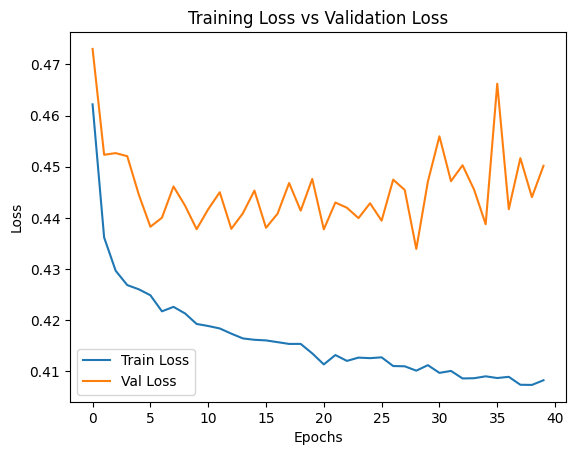

In [359]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

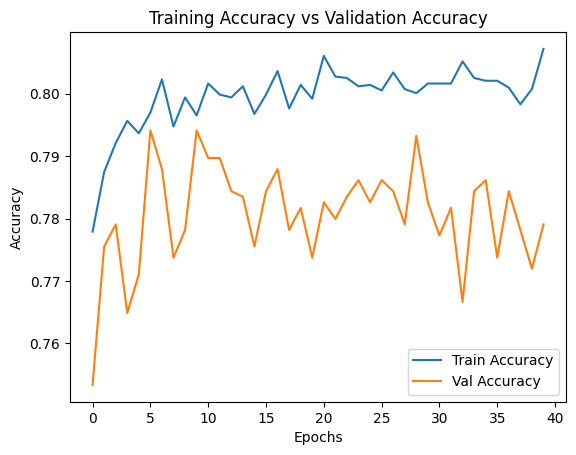

In [360]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [361]:
# check auc score
y_pred = churn_model.predict(X_test)
print("auc score:", roc_auc_score(y_test, y_pred))

# check accuracy
y_pred = churn_model.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy_score", accuracy_score(y_test, y_pred))

45/45 [==============================] - 0s 1ms/step
auc score: 0.855880008695022
45/45 [==============================] - 0s 1ms/step
accuracy_score 0.8055358410220014


#### Notes
- Grid search has given us the optimal parameters for the MLP model.
- The model has good accuracy, but the loss on the validation set is high. This could be due to overfitting.
- One of the ways to solve the problem of overfitting is to use dropout layers. Dropout layers randomly drop some neurons during training.

In [362]:
# implement dropout model
def op_dropout_model(optimizer='adam'):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(128, activation='relu')(input_layer)
    dropout_layer_1 = Dropout(0.3)(dense_layer_1)
    dense_layer_2 = Dense(64, activation='tanh')(dropout_layer_1)
    dropout_layer_2 = Dropout(0.3)(dense_layer_2)
    dense_layer_3 = Dense(32, activation='elu')(dropout_layer_2)
    dense_layer_4 = Dense(16, activation='relu')(dense_layer_3)
    dropout_layer_3 = Dropout(0.3)(dense_layer_4)
    dense_layer_5 = Dense(8, activation='tanh')(dropout_layer_3)
    output_layer = Dense(1, activation='sigmoid')(dense_layer_5)

    # define the model with input layer and output layer
    model = Model(inputs=input_layer, outputs=output_layer)

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [363]:
churn_model = op_dropout_model(optimizer=grid_result.best_estimator_.optimizer)

history = churn_model.fit(X_train, y_train, batch_size=grid_result.best_params_["batch_size"], epochs=grid_result.best_params_["epochs"], verbose=2, validation_data=(X_val, y_val))

Epoch 1/40
71/71 - 1s - loss: 0.4937 - accuracy: 0.7590 - val_loss: 0.4491 - val_accuracy: 0.7888 - 1s/epoch - 14ms/step
Epoch 2/40
71/71 - 0s - loss: 0.4637 - accuracy: 0.7726 - val_loss: 0.4524 - val_accuracy: 0.7808 - 219ms/epoch - 3ms/step
Epoch 3/40
71/71 - 0s - loss: 0.4528 - accuracy: 0.7808 - val_loss: 0.4472 - val_accuracy: 0.7853 - 183ms/epoch - 3ms/step
Epoch 4/40
71/71 - 0s - loss: 0.4506 - accuracy: 0.7797 - val_loss: 0.4470 - val_accuracy: 0.7862 - 179ms/epoch - 3ms/step
Epoch 5/40
71/71 - 0s - loss: 0.4446 - accuracy: 0.7761 - val_loss: 0.4415 - val_accuracy: 0.7835 - 177ms/epoch - 2ms/step
Epoch 6/40
71/71 - 0s - loss: 0.4405 - accuracy: 0.7810 - val_loss: 0.4428 - val_accuracy: 0.7879 - 178ms/epoch - 3ms/step
Epoch 7/40
71/71 - 0s - loss: 0.4417 - accuracy: 0.7861 - val_loss: 0.4519 - val_accuracy: 0.7817 - 174ms/epoch - 2ms/step
Epoch 8/40
71/71 - 0s - loss: 0.4379 - accuracy: 0.7877 - val_loss: 0.4498 - val_accuracy: 0.7888 - 198ms/epoch - 3ms/step
Epoch 9/40
71/71 -

In [364]:
# Evaluate the data with the test set
test_loss, test_accuracy = churn_model.evaluate(X_test, y_test)
print("Fashion Model Test Accuracy: ", str(test_accuracy))

45/45 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8070
Fashion Model Test Accuracy:  0.8069552779197693


In [365]:
epochs = history.epoch
history = history.history

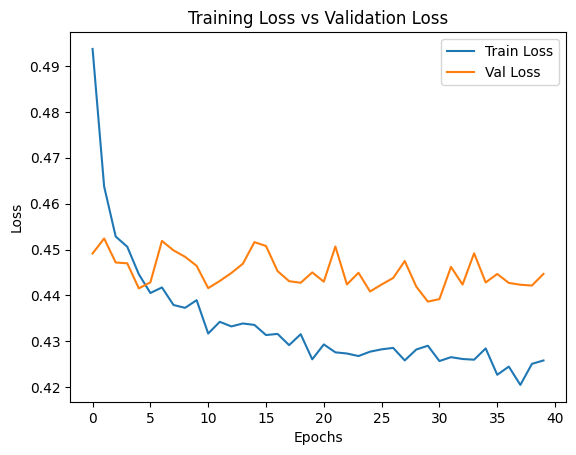

In [366]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

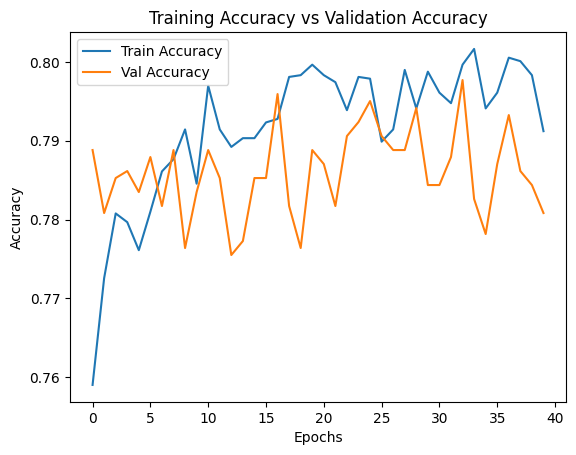

In [367]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [368]:
# check auc score
y_pred = churn_model.predict(X_test)
print("auc score:", roc_auc_score(y_test, y_pred))

# check accuracy
y_pred = churn_model.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy_score", accuracy_score(y_test, y_pred))

45/45 [==============================] - 0s 1ms/step
auc score: 0.8570768681358494
45/45 [==============================] - 0s 1ms/step
accuracy_score 0.8069552874378992


#### Notes
- The loss on the validation set has reduced significantly. This shows that the model is no longer overfitting.
- The accuracy on the validation set has also increased.
- Another way to reduce overfitting is reducing the number of neurons and hidden layers.

In [369]:
# implement grid search using kerasClassifier
def op_red_layer_model(optimizer='adam'):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(32, activation='relu')(input_layer)
    dense_layer_2 = Dense(16, activation='relu')(dense_layer_1)
    dense_layer_3 = Dense(8, activation='relu')(dense_layer_2)
    output_layer = Dense(1, activation='sigmoid')(dense_layer_3)

    # define the model with input layer and output layer
    model = Model(inputs=input_layer, outputs=output_layer)

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [370]:
churn_model = op_red_layer_model(optimizer=grid_result.best_estimator_.optimizer)

history = churn_model.fit(X_train, y_train, batch_size=grid_result.best_params_["batch_size"], epochs=grid_result.best_params_["epochs"], verbose=2, validation_data=(X_val, y_val))

Epoch 1/40
71/71 - 1s - loss: 0.5305 - accuracy: 0.7353 - val_loss: 0.4845 - val_accuracy: 0.7294 - 749ms/epoch - 11ms/step
Epoch 2/40
71/71 - 0s - loss: 0.4628 - accuracy: 0.7646 - val_loss: 0.4572 - val_accuracy: 0.7844 - 134ms/epoch - 2ms/step
Epoch 3/40
71/71 - 0s - loss: 0.4461 - accuracy: 0.7892 - val_loss: 0.4501 - val_accuracy: 0.7888 - 128ms/epoch - 2ms/step
Epoch 4/40
71/71 - 0s - loss: 0.4386 - accuracy: 0.7866 - val_loss: 0.4427 - val_accuracy: 0.7950 - 130ms/epoch - 2ms/step
Epoch 5/40
71/71 - 0s - loss: 0.4338 - accuracy: 0.7897 - val_loss: 0.4429 - val_accuracy: 0.7941 - 127ms/epoch - 2ms/step
Epoch 6/40
71/71 - 0s - loss: 0.4309 - accuracy: 0.7905 - val_loss: 0.4414 - val_accuracy: 0.7888 - 130ms/epoch - 2ms/step
Epoch 7/40
71/71 - 0s - loss: 0.4292 - accuracy: 0.7941 - val_loss: 0.4379 - val_accuracy: 0.7950 - 136ms/epoch - 2ms/step
Epoch 8/40
71/71 - 0s - loss: 0.4273 - accuracy: 0.7948 - val_loss: 0.4415 - val_accuracy: 0.7950 - 128ms/epoch - 2ms/step
Epoch 9/40
71/7

In [371]:
# Evaluate the data with the test set
test_loss, test_accuracy = churn_model.evaluate(X_test, y_test)
print("Fashion Model Test Accuracy: ", str(test_accuracy))

45/45 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8105
Fashion Model Test Accuracy:  0.8105039000511169


In [372]:
epochs = history.epoch
history = history.history

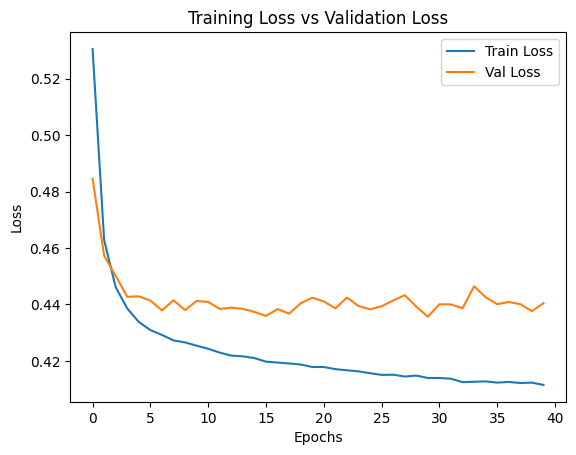

In [373]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

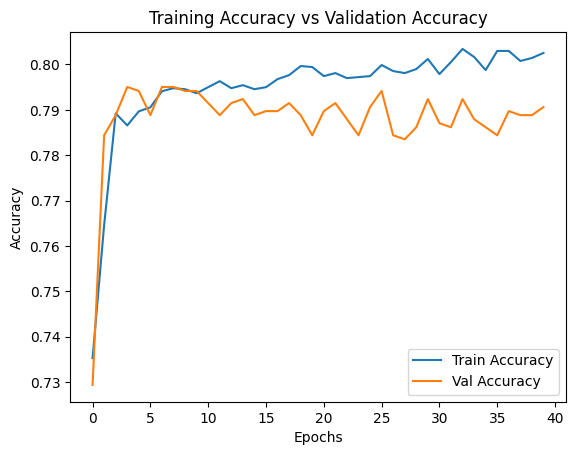

In [374]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [375]:
# check auc score
y_pred = churn_model.predict(X_test)
print("auc score:", roc_auc_score(y_test, y_pred))

45/45 [==============================] - 0s 1ms/step
auc score: 0.8566382353245625


In [376]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

Unique values in y_test: [False  True]
Unique values in y_pred: [0.00219722 0.00290098 0.00305347 ... 0.8119845  0.8129105  0.81787837]


In [377]:
y_pred_binary = (y_pred >= 0.5).astype(int)
print("accuracy_score", accuracy_score(y_test, y_pred_binary))

accuracy_score 0.8105039034776437


### Final Thoughts

- The loss has significantly reduced and the accuracy has increased.
- The model is ready to be deployed.

## Save Model

In [378]:
# save the model
churn_model.save("../models/churn_model.h5")

# save the scaler
joblib.dump(scaler, "../models/scaler.pkl")

# save the encoder
cols = [col for col in imp_cols if col not in num_cols] # get cols from imp_cols that are not in num_cols
print("cols:", cols)
encoder = OneHotEncoder()
encode = encoder.fit(data[cols])
joblib.dump(encode, "../models/encoder.pkl")

cols: ['Contract', 'InternetService', 'PaymentMethod']


/home/hesed/Codes/72522025_Churning_Customers/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['../models/encoder.pkl']